# <center><u> Chicago Crime</u> </center>

## Part I


1. Reverse engineering an existing sourse RDBMS using metadata SQL queries to identify the table and attribute details necessary for creating tables and an entity-relationship diagram depecting the database logical structure. The source data is an SQLite database.
2. Implementing a set of tables using DDL in your SSO dsa_student database schema on the postgres server that replicates the source database structure.
3. Creating an Entity Relationship Diagram.
4. Establishing connections to the source and destination databases.
5. Extracting the source data from tables, Transform values as required and Load into the destination tables.
6. Validating the ETL process by confirming row counts in both source and destination tables.


## Database exploration


In [1]:
#Load extention and connect to database
%load_ext sql
%sql sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db

'Connected: @/dsa/data/DSA-7030/cc0122dbv2.sqlite.db'

## Explore the SQLite Tables List

This quiery simply lists the names of the database tables.

In [2]:
%%sql
SELECT distinct m.type, m.tbl_name --m.sql
FROM sqlite_master AS m,
     pragma_table_info(m.name) AS t
WHERE m.type = 'table'
order by m.name, t.pk DESC

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


type,tbl_name
table,cc_case_location
table,cc_cases
table,cc_iucr_codes
table,cc_iucr_codes_primary_descriptions
table,cc_iucr_codes_secondary_descriptions
table,cc_nibrs_categories
table,cc_nibrs_crimes_against
table,cc_nibrs_fbicode_offenses
table,cc_nibrs_offenses_crimes_aginst


## Explore Column Details

The query below provdes the complete list of tables and their columns with important details.

* **tbl_name** = Name of the table
* **name** = column name
* **type** = declared data type
* **notnull** = indicates column declared as NOT NULL
* **pk** = indicates column is the primary key

In [3]:
%%sql 
SELECT m.tbl_name, t.* --m.sql
 FROM pragma_table_info(m.tbl_name) t, sqlite_master m WHERE m.type='table';

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


tbl_name,cid,name,type,notnull,dflt_value,pk
cc_case_location,0,case_number,varchar(20),0,None,1
cc_case_location,1,block,varchar(100),0,None,0
cc_case_location,2,location_description,varchar(100),0,None,0
cc_case_location,3,community_area,integer,0,None,0
cc_case_location,4,ward,integer,0,None,0
cc_case_location,5,district,integer,0,None,0
cc_case_location,6,beat,integer,0,None,0
cc_case_location,7,latitude,real,0,None,0
cc_case_location,8,longitude,real,0,None,0
cc_iucr_codes,0,iucr_code,varchar(10),0,None,1


## Below query provdes the list of columns that are declared "unique" for referential integrity enforcement.

<u>Query Output Descriptions</u>
* **name** = the table name begining at the "cc_" -- cc_case_location is table name.
* **unique** = indicates the column is declared "unique"
* **origin** = indicates the columns is declared as primary key
* **name_1** = column name

In [4]:
%%sql 
select il.*,ii.* --,m.sql
    from sqlite_master m, 
    pragma_index_list( m.name ) as il,
    pragma_index_info(il.name) as ii

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


seq,name,unique,origin,partial,seqno,cid,name_1
0,sqlite_autoindex_cc_case_location_1,1,pk,0,0,0,case_number
0,sqlite_autoindex_cc_iucr_codes_1,1,pk,0,0,0,iucr_code
0,sqlite_autoindex_cc_iucr_codes_primary_descriptions_1,1,pk,0,0,0,iucr_code
0,sqlite_autoindex_cc_iucr_codes_secondary_descriptions_1,1,pk,0,0,0,iucr_code
0,sqlite_autoindex_cc_nibrs_categories_1,1,pk,0,0,0,nibrs_offense_code
0,sqlite_autoindex_cc_nibrs_crimes_against_1,1,pk,0,0,0,nibrs_crime_against
0,sqlite_autoindex_cc_nibrs_fbicode_offenses_1,1,pk,0,0,0,nibrs_offense_code
0,sqlite_autoindex_cc_nibrs_offenses_crimes_aginst_1,1,pk,0,0,0,nibrs_crime_against
0,sqlite_autoindex_cc_nibrs_offenses_crimes_aginst_1,1,pk,0,1,1,nibrs_offense_code
0,sqlite_autoindex_cc_cases_1,1,pk,0,0,0,case_number


## Explore Relationship Details (get foreign key references)

The below query exracts the details describing the foreign key referenes bewtween tables.

* **from_table** = the name of the one-side table
* **from_column** = the name of the foreign key column in the one-side table
* **to_table** = the name of the many-side reference table
* **to_column** = the name of the foreign key column in the one-side reference table

These metadata can be translated to the necessary SQL statement to establish a relationship between tables:

```SQL
FOREIGN KEY (<from_column>) REFERENCES <to_table>(<to_column>)
```

In [5]:
%%sql
SELECT 
    m.name as from_table, f.'from' as from_column, f.'table' as to_table, f.'to' as to_column --, m.sql
FROM
    sqlite_master m
    JOIN pragma_foreign_key_list(m.name) f ON m.name != f."table"
WHERE m.type = 'table'
ORDER BY m.name
;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


from_table,from_column,to_table,to_column
cc_case_location,case_number,cc_cases,case_number
cc_cases,iucr_code,cc_iucr_codes,iucr_code
cc_iucr_codes,iucr_code,cc_cases,iucr_code
cc_iucr_codes_primary_descriptions,iucr_code,cc_iucr_codes,iucr_code
cc_iucr_codes_secondary_descriptions,iucr_code,cc_iucr_codes,iucr_code
cc_nibrs_fbicode_offenses,nibrs_offense_code,cc_cases,nibrs_fbi_offense_code
cc_nibrs_fbicode_offenses,nibrs_offense_code,cc_nibrs_categories,nibrs_offense_code
cc_nibrs_offenses_crimes_aginst,nibrs_offense_code,cc_nibrs_fbicode_offenses,nibrs_offense_code
cc_nibrs_offenses_crimes_aginst,nibrs_crime_against,cc_nibrs_crimes_against,nibrs_crime_against


In [16]:
%%sql
select * from cc_cases LIMIT 1000;


 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


case_number,incident_date,iucr_code,nibrs_fbi_offense_code,arrest,domestic,updated_on
HY411648,09/05/2015 01:30:00 PM,0486,08B,0,1,02/10/2018 03:50:01 PM
HY411615,09/04/2015 11:30:00 AM,0870,06,0,0,02/10/2018 03:50:01 PM
JC213529,09/01/2018 12:01:00 AM,0810,06,0,1,04/06/2019 04:04:43 PM
HY411595,09/05/2015 12:45:00 PM,2023,18,1,0,02/10/2018 03:50:01 PM
HY411610,09/05/2015 01:00:00 PM,0560,08A,0,1,02/10/2018 03:50:01 PM
HY411435,09/05/2015 10:55:00 AM,0610,05,0,0,02/10/2018 03:50:01 PM
HY411629,09/04/2015 06:00:00 PM,0620,05,0,0,02/10/2018 03:50:01 PM
HY411605,09/05/2015 01:00:00 PM,0860,06,1,0,09/17/2015 11:37:18 AM
HY411654,09/05/2015 11:30:00 AM,0320,03,0,1,02/10/2018 03:50:01 PM
JC212333,05/01/2016 12:25:00 AM,1153,11,0,0,04/06/2019 04:04:43 PM


### Using the metadata from above:

### Implementing the required CREATE TABLE statements for establishing the Chicago Crime Database in our SSO dsa_student database.  


In [14]:
#sql create table statements

#create cc_case_location table statement

CREATE TABLE nemf4.cc_case_location (
    case_number varchar(20),
    block varchar(100),
    location_description varchar(100),
    community_area int,
    ward int,
    district int,
    beat int,
    latitude real,
    longitude real,
    PRIMARY KEY (case_number),
    CONSTRAINT fk_location
        FOREIGN KEY(case_number)
        REFERENCES nemf4.cc_cases(case_number)
 );

#create cc_iucr_codes table statement

CREATE TABLE nemf4.cc_iucr_codes (
    iucr_code varchar(10),
    iucr_index_code char,
    PRIMARY KEY (iucr_code),
    CONSTRAINT fk_iucr_codes
        FOREIGN KEY(iucr_code)
        REFERENCES nemf4.cc_cases(iucr_code)
 );

#create cc_iucr_codes_primary_descriptions table statement

CREATE TABLE nemf4.cc_iucr_codes_primary_descriptions (
    iucr_code varchar(10),
    iucr_primary_desc varchar(100),
    PRIMARY KEY (iucr_code),
    CONSTRAINT fk_iucr_codes_pri
        FOREIGN KEY(iucr_code)
        REFERENCES nemf4.cc_iucr_codes(iucr_code)
 );

#create cc_iucr_codes_secondary_descriptions table statement

CREATE TABLE nemf4.cc_iucr_codes_secondary_descriptions (
    iucr_code varchar(10),
    iucr_secondary_desc varchar(100),
    PRIMARY KEY (iucr_code),
    CONSTRAINT fk_iucr_codes_sec
        FOREIGN KEY(iucr_code)
        REFERENCES nemf4.cc_iucr_codes(iucr_code)
 );

#create cc_nibrs_categories table statement

CREATE TABLE nemf4.cc_nibrs_categories (
    nibrs_offense_code varchar(10),
    nibrs_offense_category_name varchar(50),
    PRIMARY KEY (nibrs_offense_code)
 );

#create cc_nibrs_crimes_against table statement

CREATE TABLE nemf4.cc_nibrs_crimes_against (
    nibrs_crime_against varchar(20),
    PRIMARY KEY (nibrs_crime_against)
 );


#create cc_nibrs_fbicode_offenses table statement

CREATE TABLE nemf4.cc_nibrs_fbicode_offenses (
    nibrs_offense_code varchar(10) not null,
    nibrs_offense_name varchar(50)not null,
    PRIMARY KEY (nibrs_offense_code),
    CONSTRAINT fk_nibrs_fbicode_offenses_cases
        FOREIGN KEY(nibrs_offense_code)
        REFERENCES nemf4.cc_cases(nibrs_fbi_offense_code)
    CONSTRAINT fk_nibrs_fbicode_offenses_categ
        FOREIGN KEY(nibrs_offense_code)
        REFERENCES nemf4.cc_nibrs_categories(nibrs_offense_code)
 );


#create cc_nibrs_offenses_crimes_aginst table statement

CREATE TABLE nemf4.cc_nibrs_offenses_crimes_aginst (
    nibrs_crime_against varchar(20) not null,
    nibrs_offense_code varchar(10) not null,
    PRIMARY KEY (nibrs_crime_against, nibrs_offense_code),
    CONSTRAINT fk_nibrs_offenses_crimes_aginst_case
        FOREIGN KEY(nibrs_offense_code)
        REFERENCES nemf4.cc_nibrs_fbicode_offenses(nibrs_offense_code),
    CONSTRAINT fk_nibrs_offenses_crimes_aginst_crime
        FOREIGN KEY(nibrs_crime_against)
        REFERENCES nemf4.cc_nibrs_crimes_against(nibrs_crime_against)
 );

#create cc_cases table statement

CREATE TABLE nemf4.cc_cases (
    case_number varchar(20),
    incident_date timestamp,
    iucr_code varchar(10),
    nibrs_fbi_offense_code varchar(10),
    arrest boolean,
    domestic boolean,
    updated_on timestamp,
    PRIMARY KEY (case_number),
    CONSTRAINT fk_cases_location
        FOREIGN KEY(iucr_code)
        REFERENCES nemf4.cc_iucr_codes(iucr_code)
 );

SyntaxError: invalid syntax (<ipython-input-14-45811fb2524a>, line 5)

# Connecting to SSO database using sqlAlchmey connection and implementing database structure

In [7]:
import psycopg2
import getpass

#Set connection variables
database = "dsa_student"
user     = 'nemf4'
password = getpass.getpass("Type password and hit enter: ")
host     = 'pgsql.dsa.lan'

Type password and hit enter: ········


In [8]:
import sqlalchemy
import pandas as pd

engine = sqlalchemy.create_engine("postgresql://{u}:{pw}@{h}/{db}".format(
        u=user,h=host,db=database,pw=password
        )
    )

In [9]:
connection = psycopg2.connect(database = database,
                              user     = user,
                              host     = 'pgsql.dsa.lan',
                              password = password)

In [18]:
# del password

In [19]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_cases (
            case_number varchar(20),
            incident_date timestamp,
            iucr_code varchar(10),
            nibrs_fbi_offense_code varchar(10),
            arrest boolean,
            domestic boolean,
            updated_on timestamp,
            PRIMARY KEY (case_number)
            
 );
        '''
    )


In [20]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_case_location
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_case_location (
            case_number varchar(20),
            block varchar(100),
            location_description varchar(100),
            community_area int,
            ward int,
            district int,
            beat int,
            latitude real,
            longitude real,
            PRIMARY KEY (case_number),
            CONSTRAINT fk_location
                FOREIGN KEY(case_number)
                REFERENCES nemf4.cc_cases(case_number)
        );
        '''
    )


In [21]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_incur_codes
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_iucr_codes (
            iucr_code varchar(10),
            iucr_index_code char,
            PRIMARY KEY (iucr_code)
            
        );
        '''
    )


In [22]:

with connection, connection.cursor() as cursor:    
    
    #altering table cc_cases adding foreign key
    cursor.execute(
        '''
        ALTER TABLE nemf4.cc_cases
            ADD CONSTRAINT fk_cases_location 
                    FOREIGN KEY(iucr_code)
                    REFERENCES cc_iucr_codes(iucr_code);
        '''
    )


In [23]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_iucr_codes_primary_descriptions
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_iucr_codes_primary_descriptions (
            iucr_code varchar(10),
            iucr_primary_desc varchar(100),
            PRIMARY KEY (iucr_code),
            CONSTRAINT fk_iucr_codes_pri
                FOREIGN KEY(iucr_code)
                REFERENCES cc_iucr_codes(iucr_code)
     );
        '''
    )


In [24]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_iucr_codes_secondary_descriptions
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_iucr_codes_secondary_descriptions (
            iucr_code varchar(10),
            iucr_secondary_desc varchar(100),
            PRIMARY KEY (iucr_code),
            CONSTRAINT fk_iucr_codes_sec
                FOREIGN KEY(iucr_code)
                REFERENCES cc_iucr_codes(iucr_code)
     );
        '''
    )

In [25]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_nibrs_categories
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_nibrs_categories (
            nibrs_offense_code varchar(10),
            nibrs_offense_category_name varchar(50),
            PRIMARY KEY (nibrs_offense_code)
     );
        '''
    )



In [26]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_nibrs_crimes_against
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_nibrs_crimes_against (
            nibrs_crime_against varchar(20),
            PRIMARY KEY (nibrs_crime_against)
         );
        '''
    )


In [27]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_nibrs_fbicode_offenses
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_nibrs_fbicode_offenses (
            nibrs_offense_code varchar(10) not null,
            nibrs_offense_name varchar(50)not null,
            PRIMARY KEY (nibrs_offense_code),
            CONSTRAINT fk_nibrs_fbicode_offenses_categ
                FOREIGN KEY(nibrs_offense_code)
                REFERENCES cc_nibrs_categories(nibrs_offense_code)
         );
        '''
    )


In [28]:
with connection, connection.cursor() as cursor:    
    
    #altering table cc_case by adding foreign key
    cursor.execute(
        '''
        ALTER TABLE nemf4.cc_cases
             ADD   CONSTRAINT fk_cases_nibrs
                    FOREIGN KEY(nibrs_fbi_offense_code)
                    REFERENCES cc_nibrs_fbicode_offenses(nibrs_offense_code);
        '''
    )

In [29]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_nibrs_offenses_crimes_aginst
    cursor.execute(
        '''
        CREATE TABLE nemf4.cc_nibrs_offenses_crimes_aginst (
            nibrs_crime_against varchar(20) not null,
            nibrs_offense_code varchar(10) not null,
            PRIMARY KEY (nibrs_crime_against, nibrs_offense_code),
            CONSTRAINT fk_nibrs_offenses_crimes_aginst_case
                FOREIGN KEY(nibrs_offense_code)
                REFERENCES cc_nibrs_fbicode_offenses(nibrs_offense_code),
            CONSTRAINT fk_nibrs_offenses_crimes_aginst_crime
                FOREIGN KEY(nibrs_crime_against)
                REFERENCES cc_nibrs_crimes_against(nibrs_crime_against)
         );
        '''
    )

In [10]:
#drop query to drop the tables

# with connection, connection.cursor() as cursor:    
    
#     #Creating table cc_nibrs_offenses_crimes_aginst
#     cursor.execute(
#         '''
#         DROP TABLE nemf4.cc_case_location, nemf4.cc_iucr_codes, nemf4.cc_iucr_codes_primary_descriptions, nemf4.cc_iucr_codes_secondary_descriptions, nemf4.cc_nibrs_categories, nemf4.cc_nibrs_crimes_against, nemf4.cc_nibrs_fbicode_offenses, nemf4.cc_nibrs_offenses_crimes_aginst, nemf4.cc_cases;
#         '''
#     )



In [1]:
# connection.close()

In [2]:
#implement tables in SSO database

## Construct and embed your Entity Relationship Diagram

Upload your ERD image to the "final_project" folder and update the markdown below to display it here:

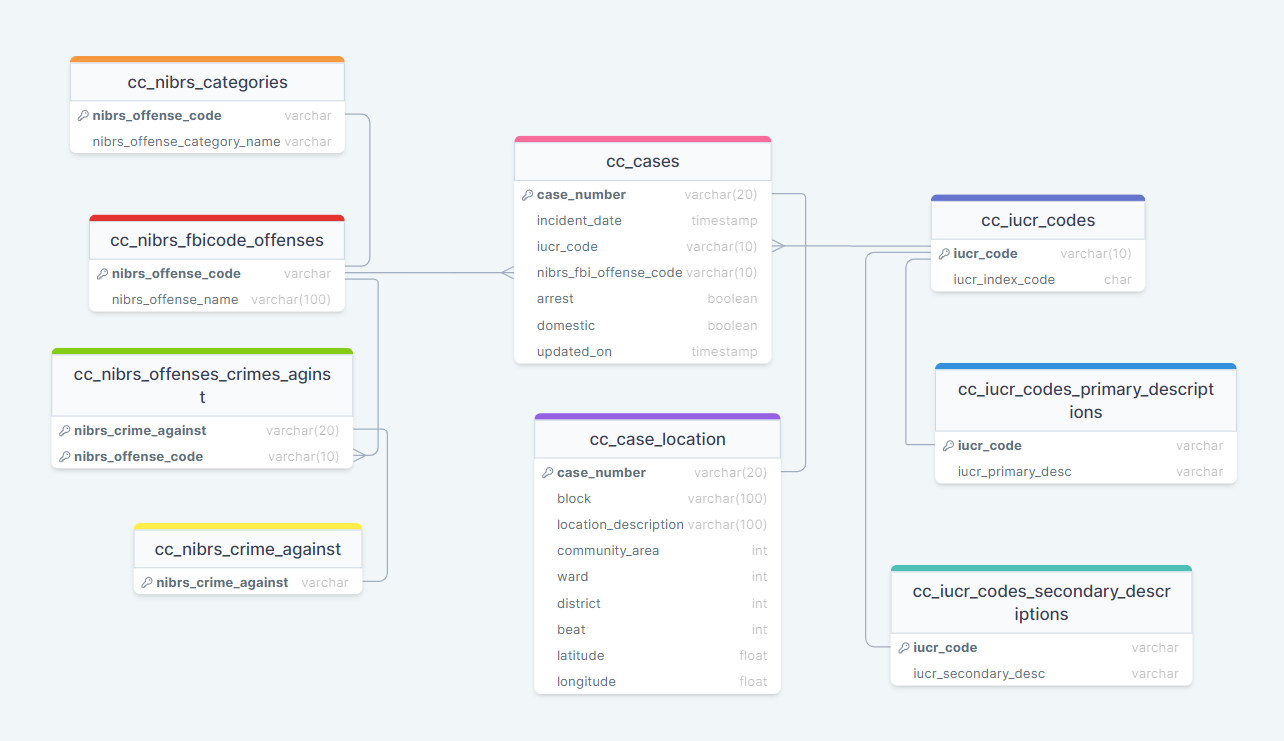

# Performing the ETL of the source data to SSO dsa_student Chicago Crime Database

* Establishing a connection to the the SQLite source database using sqlAlchemy
* Establishing a connection to SSQ dsa_student postgres server destination database using sqlAlchemy
* Peforming ETL of the source data tables to the destination data tables incrementally.
    

In [11]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("/dsa/data/DSA-7030/cc0122dbv2.sqlite.db")

df = pd.read_sql_query("SELECT * from cc_iucr_codes;", con)

df.to_sql('cc_iucr_codes', # The table to load
          engine,             # The engine created above
          schema= user,   # The schema where the table lives, our pawprint
          if_exists='append', # If the table is found, it would keep loading the end of table.
          index=False,        # Recall that panda data frame has a row index, so we need to ignore it
          chunksize=10000)       # Do 10000 records from the data frame at a time - this enhances performance for BIG DATA frames/.csv


In [31]:
df = pd.read_sql_query("SELECT * from cc_iucr_codes_primary_descriptions;", con)

df.to_sql('cc_iucr_codes_primary_descriptions', 
          engine,             
          schema= user,   
          if_exists='append', 
          index=False,        
          chunksize=10000)  

In [32]:
df = pd.read_sql_query("SELECT * from cc_iucr_codes_secondary_descriptions;", con)

df.to_sql('cc_iucr_codes_secondary_descriptions', 
          engine,             
          schema= user,   
          if_exists='append', 
          index=False,       
          chunksize=10000)      

In [33]:
df = pd.read_sql_query("SELECT * from cc_nibrs_categories;", con)

df.to_sql('cc_nibrs_categories', 
          engine,             
          schema= user,   
          if_exists='append', 
          index=False,        
          chunksize=10000)   

In [34]:
df = pd.read_sql_query("SELECT * from cc_nibrs_crimes_against;", con)

df.to_sql('cc_nibrs_crimes_against', 
          engine,         
          schema= user,  
          if_exists='append', 
          index=False,  
          chunksize=10000)  

In [35]:
df = pd.read_sql_query("SELECT * from cc_nibrs_fbicode_offenses;", con)

df.to_sql('cc_nibrs_fbicode_offenses', 
          engine,   
          schema= user,  
          if_exists='append', 
          index=False,    
          chunksize=10000)    

In [38]:
df = pd.read_sql_query("SELECT * from cc_cases;", con, chunksize = 10000)

for df_r in df:
    df_r.arrest = df_r.arrest.astype('bool') 
    df_r.domestic = df_r.domestic.astype('bool') 
    
    df_r.to_sql('cc_cases', 
          engine,             
          schema= user,   
          if_exists='append', 
          index=False,        
          chunksize=10000)       
    
    print(df_r.head())


# con.close()

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HY411648  09/05/2015 01:30:00 PM      0486                    08B   
1    HY411615  09/04/2015 11:30:00 AM      0870                     06   
2    JC213529  09/01/2018 12:01:00 AM      0810                     06   
3    HY411595  09/05/2015 12:45:00 PM      2023                     18   
4    HY411610  09/05/2015 01:00:00 PM      0560                    08A   

   arrest  domestic              updated_on  
0   False      True  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2   False      True  04/06/2019 04:04:43 PM  
3    True     False  02/10/2018 03:50:01 PM  
4   False      True  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HY427837  09/18/2015 01:15:00 AM      0320                     03   
1    HY427701  09/17/2015 11:30:00 AM      0620                     05   
2    HY427797  09/18/2015 12:50:00 AM      1320          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HY545374  12/21/2015 02:40:00 PM      0810                     06   
1    HY545350  12/20/2015 11:00:00 AM      0486                    08B   
2    HY545444  12/07/2015 08:00:00 AM      1310                     14   
3    HY545394  12/20/2015 05:28:00 PM      1154                     11   
4    JC473335  10/14/2019 10:56:00 PM      1477                     15   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False      True  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  10/21/2019 04:19:28 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HZ105776  01/05/2016 04:00:00 PM      0460                    08B   
1    JC472192  10/14/2019 12:18:00 PM      0820                     06   
2    JC472717  10/14/2019 05:20:00 PM      1310          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HZ365031  07/26/2016 10:30:00 AM      0486                    08B   
1    HZ365129  07/26/2016 11:40:00 AM      2024                     18   
2    HZ365140  07/23/2016 01:00:00 PM      0810                     06   
3    HZ365111  03/28/2016 09:00:00 AM      1154                     11   
4    HZ365163  07/26/2016 11:30:00 AM      0860                     06   

   arrest  domestic              updated_on  
0   False      True  02/10/2018 03:50:01 PM  
1    True     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4    True     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HZ382482  07/30/2016 12:30:00 PM      2820                     26   
1    HZ382141  08/07/2016 12:00:00 PM      1150                     11   
2    HZ382359  08/07/2016 03:45:00 PM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HZ478553  10/17/2016 10:20:00 PM      0320                     03   
1    HZ479833  10/18/2016 07:12:00 PM      0460                    08B   
2    HZ479575  10/18/2016 04:40:00 PM      0560                    08A   
3    HZ479735  10/08/2016 05:45:00 PM      0890                     06   
4    HZ479852  10/18/2016 05:00:00 PM      0460                    08B   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HZ497228  10/31/2016 08:00:00 PM      0610                     05   
1    HZ497240  10/31/2016 08:50:00 PM      0460                    08B   
2    HZ496970  10/29/2016 09:00:00 AM      1150          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JA254036  05/06/2017 08:00:00 PM      0920                     07   
1    JC475893  10/17/2019 10:10:00 AM      0860                     06   
2    JC476102  10/17/2019 02:00:00 AM      1305                     14   
3    JA253968  05/07/2017 08:35:00 AM      1320                     14   
4    JA254048  04/20/2017 02:32:00 PM      1150                     11   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1    True     False  10/24/2019 04:04:33 PM  
2   False     False  10/24/2019 04:04:33 PM  
3    True     False  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JA270726  05/19/2017 02:00:00 PM      0870                     06   
1    JA267426  05/17/2017 11:55:00 AM      0486                    08B   
2    JA271670  05/20/2017 08:10:00 AM      0530          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JC479987  10/18/2019 08:20:00 PM      0495                    04B   
1    JA420358  09/05/2017 12:30:00 AM      0620                     05   
2    JA420439  09/05/2017 06:45:00 PM      0890                     06   
3    JA420402  09/05/2017 11:00:00 PM      0486                    08B   
4    JA420437  09/06/2017 01:34:00 AM      0486                    08B   

   arrest  domestic              updated_on  
0   False     False  10/25/2019 03:56:45 PM  
1   False     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False      True  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JD457428  12/12/2020 05:12:00 PM      502P                     26   
1    JA437227  09/19/2017 02:13:00 AM      0610                     05   
2    JA437927  08/21/2017 03:53:00 PM      2826          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JA532879  12/01/2017 06:08:00 PM      502R                     26   
1    JA532931  12/01/2017 07:45:00 PM      0860                     06   
2    JA532935  12/01/2017 07:20:00 PM      0486                    08B   
3    JA532793  11/30/2017 03:30:00 PM      1152                     11   
4    JA532923  12/01/2017 06:49:00 PM      1811                     18   

   arrest  domestic              updated_on  
0    True     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2    True      True  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4    True     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JA550616  12/12/2017 09:00:00 AM      1156                     11   
1    JA550600  12/15/2017 05:00:00 PM      0486                    08B   
2    JA550525  12/15/2017 03:35:00 PM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JB360706  07/22/2018 03:00:00 AM      0430                    04B   
1    JB360844  07/22/2018 05:31:00 PM      1150                     11   
2    JB360758  07/22/2018 05:52:00 PM      0460                    08B   
3    JB360839  07/22/2018 06:38:00 PM      0860                     06   
4    JB360841  07/22/2018 05:00:00 PM      0890                     06   

   arrest  domestic              updated_on  
0   False     False  07/29/2018 03:54:54 PM  
1   False     False  07/29/2018 03:54:54 PM  
2   False     False  07/29/2018 03:54:54 PM  
3    True     False  07/29/2018 03:54:54 PM  
4   False     False  07/29/2018 03:54:54 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JB571254  12/26/2018 09:00:00 AM      1154                     11   
1    JB571230  12/22/2018 11:00:00 AM      0910                     07   
2    JB571257  12/29/2018 10:30:00 AM      0810          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G039722  01/12/2001 08:00:00 AM      1320                     14   
1     G035098  01/17/2001 12:07:43 PM      0820                     06   
2     G039307  01/19/2001 11:00:00 AM      1350                     26   
3     G041350  01/19/2001 11:00:00 AM      0820                     06   
4     G040439  01/19/2001 07:00:00 PM      4255                     26   

   arrest  domestic              updated_on  
0   False     False  08/17/2015 03:03:40 PM  
1    True     False  08/17/2015 03:03:40 PM  
2    True     False  08/17/2015 03:03:40 PM  
3   False     False  08/17/2015 03:03:40 PM  
4   False      True  08/17/2015 03:03:40 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G034335  01/16/2001 09:07:12 PM      1811                     18   
1     G058369  01/28/2001 07:20:00 PM      0810                     06   
2     G059295  01/26/2001 03:30:00 PM      0810          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G195720  04/06/2001 05:57:00 PM      0820                     06   
1     G202700  04/09/2001 08:20:00 PM      0320                     03   
2     G195782  04/06/2001 06:16:54 PM      0420                    04B   
3     G196126  04/06/2001 08:30:00 PM      0560                    08A   
4     G185460  04/01/2001 09:50:09 PM      1811                     18   

   arrest  domestic              updated_on  
0   False     False  08/17/2015 03:03:40 PM  
1   False      True  08/17/2015 03:03:40 PM  
2   False      True  08/17/2015 03:03:40 PM  
3   False     False  08/17/2015 03:03:40 PM  
4    True     False  08/17/2015 03:03:40 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G214473  04/15/2001 11:00:00 AM      0420                    04B   
1    JD196290  03/27/2020 04:29:00 PM      2890                     24   
2    HY323829  07/01/2015 05:15:00 PM      0860          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G356062  06/19/2001 05:45:00 AM      0810                     06   
1     G354864  06/17/2001 03:00:00 PM      0610                     05   
2     G355775  06/18/2001 11:00:00 PM      0910                     07   
3     G356071  06/18/2001 12:00:00 PM      0920                     07   
4     G355799  06/18/2001 10:30:00 PM      2825                     26   

   arrest  domestic              updated_on  
0   False      True  08/17/2015 03:03:40 PM  
1   False     False  08/17/2015 03:03:40 PM  
2   False     False  08/17/2015 03:03:40 PM  
3   False     False  08/17/2015 03:03:40 PM  
4   False     False  08/17/2015 03:03:40 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G356998  06/19/2001 04:39:41 PM      2095                     18   
1     G366169  06/23/2001 04:48:00 PM      0820                     06   
2     G370446  06/25/2001 05:30:00 AM      0610          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G518450  08/29/2001 06:30:00 PM      0610                     05   
1     G516681  08/29/2001 02:00:00 PM      0820                     06   
2     G507512  08/25/2001 12:50:00 PM      2027                     18   
3     G516494  08/25/2001 10:00:00 AM      0820                     06   
4     G518713  08/09/2001 12:00:00 PM      1120                     10   

   arrest  domestic              updated_on  
0   False     False  08/17/2015 03:03:40 PM  
1   False     False  08/17/2015 03:03:40 PM  
2    True     False  08/17/2015 03:03:40 PM  
3   False     False  08/17/2015 03:03:40 PM  
4   False     False  08/17/2015 03:03:40 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HY194332  03/22/2015 01:57:00 PM      1661                     19   
1     G518814  08/30/2001 12:10:00 PM      2017                     18   
2     G524799  09/02/2001 04:00:00 AM      1811          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G685775  11/14/2001 09:30:00 AM      0620                     05   
1     G686514  11/14/2001 08:45:00 PM      051A                    04A   
2     G688507  11/15/2001 08:00:00 PM      0460                    08B   
3     G689489  11/16/2001 10:00:00 AM      0820                     06   
4     G687137  11/15/2001 08:20:00 AM      1310                     14   

   arrest  domestic              updated_on  
0   False     False  08/17/2015 03:03:40 PM  
1   False     False  08/17/2015 03:03:40 PM  
2   False      True  08/17/2015 03:03:40 PM  
3   False     False  08/17/2015 03:03:40 PM  
4   False     False  08/17/2015 03:03:40 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0     G705745  11/24/2001 08:30:00 AM      0910                     07   
1     G698960  11/20/2001 06:19:00 PM      1320                     14   
2     G704324  11/23/2001 05:45:00 PM      0810          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HH153699  01/28/2002 02:49:35 PM      0340                     03   
1    HH152760  01/28/2002 03:15:27 AM      2022                     18   
2    HH158102  01/30/2002 07:00:00 AM      0820                     06   
3    HH156116  01/29/2002 05:25:00 PM      1320                     14   
4    HH158125  01/30/2002 06:00:00 PM      0460                    08B   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1    True     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False      True  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HH176166  02/09/2002 03:55:00 AM      0326                     03   
1    HH175598  02/08/2002 09:00:00 PM      0560                    08A   
2    HH176298  02/08/2002 09:00:00 PM      0820          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HH249192  03/18/2002 03:20:00 AM      1811                     18   
1    HH256388  03/21/2002 12:45:00 PM      0820                     06   
2    HH246598  03/16/2002 05:06:18 PM      1811                     18   
3    HH256396  03/20/2002 11:00:00 AM      2820                     26   
4    HH248652  03/17/2002 07:35:00 PM      1506                     16   

   arrest  domestic              updated_on  
0    True     False  02/28/2018 03:56:25 PM  
1   False     False  02/28/2018 03:56:25 PM  
2    True     False  02/10/2018 03:50:01 PM  
3   False      True  02/28/2018 03:56:25 PM  
4    True     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HY196507  03/24/2015 11:53:00 AM      1310                     14   
1    HH273597  03/29/2002 07:00:00 PM      2825                     26   
2    HH273643  03/29/2002 07:45:00 PM      0312          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HH456866  06/19/2002 08:30:00 AM      0560                    08A   
1    HH452030  06/19/2002 04:20:00 AM      041B                    04B   
2    HH462495  06/23/2002 08:00:00 PM      0460                    08B   
3    HH460195  06/22/2002 07:10:00 PM      0820                     06   
4    HH455676  06/20/2002 07:55:06 PM      0460                    08B   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1   False     False  02/28/2018 03:56:25 PM  
2   False      True  02/28/2018 03:56:25 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HH477400  06/30/2002 06:05:00 AM      031A                     03   
1    HH476778  06/29/2002 10:23:15 PM      0460                    08B   
2    HH477799  06/30/2002 08:00:00 AM      0820          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HH858703  12/25/2002 03:57:59 AM      1365                     26   
1    HH838727  12/14/2002 06:56:50 PM      2024                     18   
2    HH863511  12/28/2002 05:39:00 AM      0486                    08B   
3    HH865351  12/29/2002 03:37:00 AM      1310                     14   
4    HH852951  12/21/2002 08:05:57 PM      1320                     14   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False      True  02/10/2018 03:50:01 PM  
3   False     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HH844763  12/17/2002 07:47:00 PM      1506                     16   
1    HH852575  12/21/2002 04:15:00 PM      2024                     18   
2    HH863098  12/27/2002 09:30:00 PM      1506          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HJ177668  02/11/2003 01:20:00 PM      1812                     18   
1    HJ178319  02/11/2003 07:15:00 PM      2027                     18   
2    HJ191557  02/18/2003 09:40:20 PM      0880                     06   
3    HJ196128  02/20/2003 10:00:00 PM      1310                     14   
4    HJ194910  02/20/2003 03:35:00 PM      0440                    08B   

   arrest  domestic              updated_on  
0    True     False  02/28/2018 03:56:25 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False     False  02/28/2018 03:56:25 PM  
3   False     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HJ212263  03/01/2003 07:00:00 AM      2820                     26   
1    JC504585  11/09/2019 04:00:00 PM      0486                    08B   
2    JC504912  11/09/2019 08:30:00 PM      0479          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HJ452023  06/24/2003 11:00:00 PM      1310                     14   
1    HJ424205  06/12/2003 12:50:00 PM      2027                     18   
2    HJ449001  06/23/2003 08:50:00 PM      0486                    08B   
3    HJ451838  06/25/2003 01:30:00 AM      0610                     05   
4    HJ449733  06/24/2003 03:30:00 AM      0610                     05   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False      True  02/28/2018 03:56:25 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HJ446647  06/22/2003 08:30:00 PM      2092                     26   
1    HJ465023  07/01/2003 07:38:01 AM      0486                    08B   
2    HJ465745  07/01/2003 02:17:24 PM      0560          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HJ653639  09/25/2003 07:19:54 PM      0486                    08B   
1    HJ657307  09/27/2003 03:27:54 PM      0860                     06   
2    HJ656561  09/26/2003 10:15:00 PM      0560                    08A   
3    HJ651550  09/24/2003 06:00:00 PM      0860                     06   
4    HJ658471  09/28/2003 08:20:00 AM      0560                    08A   

   arrest  domestic              updated_on  
0    True     False  02/28/2018 03:56:25 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False     False  02/28/2018 03:56:25 PM  
3    True     False  02/28/2018 03:56:25 PM  
4   False      True  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HJ494797  07/15/2003 02:10:00 AM      0486                    08B   
1    HJ498140  07/16/2003 01:30:11 PM      0890                     06   
2    HJ503936  07/17/2003 06:00:00 AM      0820          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HJ780056  11/24/2003 08:54:16 PM      1310                     14   
1    HJ771595  11/20/2003 03:18:00 PM      2825                     26   
2    HJ771281  11/20/2003 03:47:43 PM      0497                    04B   
3    HJ766347  11/18/2003 09:51:00 AM      0340                     03   
4    HJ724487  10/28/2003 11:18:32 PM      2027                     18   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1   False      True  02/28/2018 03:56:25 PM  
2   False      True  02/28/2018 03:56:25 PM  
3   False     False  02/28/2018 03:56:25 PM  
4    True     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HJ795356  12/03/2003 09:43:57 AM      1330                     26   
1    HJ797481  12/03/2003 09:00:00 AM      1310                     14   
2    HJ796917  12/03/2003 11:59:00 PM      502P          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK127905  01/15/2004 12:04:00 AM      2027                     18   
1    HK175969  02/10/2004 06:00:00 PM      4387                     26   
2    HK175239  02/10/2004 06:00:00 PM      1792                     20   
3    HJ651877  09/24/2003 09:45:00 PM      2027                     18   
4    JC280339  05/27/2019 08:15:00 AM      0486                    08B   

   arrest  domestic              updated_on  
0    True     False  02/28/2018 03:56:25 PM  
1   False      True  02/28/2018 03:56:25 PM  
2   False     False  02/28/2018 03:56:25 PM  
3    True     False  02/10/2018 03:50:01 PM  
4   False      True  06/30/2019 03:56:27 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK191779  02/19/2004 11:20:00 AM      0486                    08B   
1    HK192022  02/19/2004 01:20:00 PM      0610                     05   
2    HK136506  01/20/2004 07:10:00 PM      2092          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK301533  04/14/2004 03:20:00 PM      1320                     14   
1    HK188837  02/17/2004 08:00:26 PM      1811                     18   
2    HK301219  04/14/2004 01:30:34 PM      0560                    08A   
3    HK300253  04/08/2004 09:00:00 AM      0841                     06   
4    HK301428  01/12/2004 12:10:00 AM      1195                     11   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False     False  02/28/2018 03:56:25 PM  
3   False     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK297146  02/09/2004 08:00:00 AM      0890                     06   
1    HK319151  04/23/2004 02:10:00 AM      2820                     26   
2    HK318256  04/22/2004 04:00:00 PM      1563          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK544822  08/08/2004 03:05:00 PM      041A                    04B   
1    HK519618  07/27/2004 08:17:00 PM      1811                     18   
2    HK545502  08/08/2004 09:30:00 AM      0610                     05   
3    HK545420  08/08/2004 07:50:00 PM      0486                    08B   
4    HK545116  08/08/2004 05:35:00 PM      0312                     03   

   arrest  domestic              updated_on  
0    True     False  02/10/2018 03:50:01 PM  
1    True     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False      True  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK616320  09/11/2004 01:45:00 AM      0870                     06   
1    HK614123  09/10/2004 09:00:00 AM      0560                    08A   
2    HK616307  09/10/2004 05:30:00 PM      0820          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK832950  12/28/2004 09:06:59 PM      0486                    08B   
1    HK831190  12/26/2004 11:30:00 PM      2820                     26   
2    HK252590  03/20/2004 11:52:00 PM      1310                     14   
3    HK797002  12/08/2004 12:16:34 PM      2027                     18   
4    HK830984  12/27/2004 06:49:15 PM      1330                     26   

   arrest  domestic              updated_on  
0   False      True  02/28/2018 03:56:25 PM  
1   False     False  02/28/2018 03:56:25 PM  
2   False     False  02/10/2018 03:50:01 PM  
3    True     False  02/28/2018 03:56:25 PM  
4    True     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK724305  11/01/2004 01:10:00 PM      1811                     18   
1    HK729312  11/03/2004 08:04:00 PM      1811                     18   
2    HL109479  01/06/2005 11:00:00 AM      0470          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL333723  05/03/2005 03:00:00 PM      0560                    08A   
1    HL344380  05/09/2005 12:00:00 AM      1320                     14   
2    HL343901  05/08/2005 10:31:00 PM      0530                    04A   
3    HL343661  05/08/2005 08:15:53 PM      1320                     14   
4    HL343577  05/08/2005 12:00:00 PM      0610                     05   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1   False     False  02/10/2018 03:50:01 PM  
2   False     False  02/28/2018 03:56:25 PM  
3   False     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL278031  04/06/2005 01:47:21 PM      1811                     18   
1    HL358827  05/16/2005 12:00:00 AM      1320                     14   
2    HL349494  05/11/2005 11:56:00 AM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL431832  06/20/2005 04:11:19 AM      0610                     05   
1    HL430075  06/19/2005 03:58:28 AM      2825                     26   
2    HL432019  06/19/2005 07:00:00 PM      1310                     14   
3    HL366263  05/19/2005 05:43:21 PM      1811                     18   
4    HL427329  06/17/2005 12:00:00 PM      0320                     03   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False      True  02/28/2018 03:56:25 PM  
2   False     False  02/10/2018 03:50:01 PM  
3    True     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL447755  06/16/2005 06:00:00 PM      0820                     06   
1    HL446220  06/26/2005 11:59:41 PM      0460                    08B   
2    HL448769  06/28/2005 02:00:00 AM      0820          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL610465  09/11/2005 03:30:00 PM      0860                     06   
1    HL610490  09/13/2005 08:00:00 PM      2825                     26   
2    HL610538  09/13/2005 06:00:00 PM      0460                    08B   
3    HL610524  09/13/2005 11:00:00 AM      0910                     07   
4    JC289380  06/02/2019 06:54:00 PM      2250                     22   

   arrest  domestic              updated_on  
0    True     False  02/28/2018 03:56:25 PM  
1    True      True  02/28/2018 03:56:25 PM  
2   False     False  02/28/2018 03:56:25 PM  
3   False     False  02/28/2018 03:56:25 PM  
4    True     False  06/30/2019 03:56:27 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL623153  09/19/2005 10:45:00 PM      0910                     07   
1    HL619795  09/18/2005 11:00:00 AM      0460                    08B   
2    HL563359  08/21/2005 08:57:12 PM      1811          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL787105  12/13/2005 01:50:00 PM      0560                    08A   
1    HL786421  12/13/2005 07:05:00 AM      0560                    08A   
2    HL784754  12/11/2005 05:00:00 PM      0890                     06   
3    HL786732  12/09/2005 11:15:00 AM      2840                     24   
4    HL786651  12/13/2005 09:40:00 AM      0460                    08B   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False     False  02/28/2018 03:56:25 PM  
3    True     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL805088  12/23/2005 02:35:00 AM      2820                     26   
1    HL806928  12/24/2005 12:15:00 AM      0420                    04B   
2    HL807330  12/23/2005 07:30:00 PM      0810          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HM300061  04/18/2006 08:30:00 PM      0910                     07   
1    HM299909  03/14/2006 08:00:00 PM      1152                     11   
2    HM299255  04/19/2006 04:53:58 AM      0820                     06   
3    HM298725  04/18/2006 03:15:00 PM      0890                     06   
4    HM300617  04/19/2006 06:48:13 PM      0460                    08B   

   arrest  domestic              updated_on  
0    True     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2    True     False  02/28/2018 03:56:25 PM  
3   False     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HM311872  04/25/2006 01:16:00 PM      0460                    08B   
1    HM310970  04/24/2006 10:30:00 PM      0486                    08B   
2    HM223047  03/09/2006 08:40:25 PM      2092          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HM384456  05/24/2006 10:30:00 AM      1310                     14   
1    HM381994  05/30/2006 09:30:00 AM      0486                    08B   
2    HM385445  05/31/2006 05:55:00 PM      0486                    08B   
3    HM386490  05/31/2006 08:00:00 PM      0910                     07   
4    HM382030  05/27/2006 08:00:00 PM      1310                     14   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False      True  02/10/2018 03:50:01 PM  
2    True      True  02/28/2018 03:56:25 PM  
3   False     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HM524226  08/06/2006 09:25:00 PM      1320                     14   
1    HM504002  07/28/2006 03:20:00 AM      0486                    08B   
2    JC294152  06/06/2019 12:00:00 AM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HM704925  11/06/2006 04:04:00 PM      0880                     06   
1    HM704013  11/02/2006 01:00:00 PM      0460                    08B   
2    JC298348  06/09/2019 01:00:00 AM      1210                     11   
3    HY266806  05/07/2015 08:45:00 PM      0486                    08B   
4    HM694342  10/31/2006 11:48:46 PM      1811                     18   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1   False     False  02/28/2018 03:56:25 PM  
2   False     False  06/30/2019 03:56:27 PM  
3   False      True  02/10/2018 03:50:01 PM  
4    True     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HM717635  11/13/2006 12:30:00 AM      0820                     06   
1    HM719747  11/14/2006 10:30:00 AM      0820                     06   
2    HM720044  11/14/2006 02:15:00 PM      0320          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN222481  03/12/2007 05:45:00 PM      0820                     06   
1    HN224313  03/13/2007 01:45:00 PM      5002                     26   
2    HM500703  07/26/2006 02:45:00 PM      1330                     26   
3    HM762966  12/08/2006 01:43:00 PM      2014                     18   
4    HN224768  03/13/2007 09:55:15 PM      0460                    08B   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False     False  02/28/2018 03:56:25 PM  
3    True     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN238561  03/21/2007 06:30:00 AM      0610                     05   
1    HN236043  03/19/2007 10:50:00 PM      0486                    08B   
2    HN239749  03/21/2007 10:00:00 PM      1320          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN256420  03/30/2007 03:56:00 PM      1811                     18   
1    JD335600  08/17/2020 01:55:00 PM      0820                     06   
2    HN295799  04/21/2007 12:15:00 AM      1360                     26   
3    HN297895  04/22/2007 04:35:00 AM      1310                     14   
4    HN283690  04/14/2007 08:52:43 PM      2027                     18   

   arrest  domestic              updated_on  
0    True     False  02/28/2018 03:56:25 PM  
1   False     False  08/24/2020 03:49:47 PM  
2    True     False  02/10/2018 03:50:01 PM  
3   False      True  02/28/2018 03:56:25 PM  
4    True     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN313725  04/29/2007 02:00:00 AM      0610                     05   
1    HN309971  04/28/2007 09:18:58 AM      1811                     18   
2    HN311459  04/29/2007 01:30:00 AM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HM716443  11/12/2006 01:57:00 PM      1320                     14   
1    JC305043  06/12/2019 09:00:00 AM      0486                    08B   
2    HN439934  07/01/2007 04:00:00 PM      0910                     07   
3    HN442341  07/02/2007 07:05:00 PM      0486                    08B   
4    HM534777  08/11/2006 09:51:00 PM      1365                     26   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1   False     False  06/30/2019 03:56:27 PM  
2    True     False  02/28/2018 03:56:25 PM  
3    True     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN461168  07/11/2007 08:30:00 AM      1320                     14   
1    HN459387  07/10/2007 10:00:00 PM      0486                    08B   
2    HN460953  07/12/2007 01:30:00 AM      1330          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN680056  10/30/2007 03:00:00 AM      1305                     14   
1    HN679516  10/30/2007 07:20:00 PM      0470                     24   
2    HN677454  10/29/2007 07:00:00 PM      0820                     06   
3    HN673446  10/27/2007 04:57:03 PM      2024                     18   
4    HN676523  10/29/2007 11:47:00 AM      2027                     18   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False     False  02/10/2018 03:50:01 PM  
3    True     False  02/28/2018 03:56:25 PM  
4    True     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN693326  11/07/2007 12:45:00 AM      0486                    08B   
1    HN691054  11/05/2007 06:00:00 PM      0890                     06   
2    HN683684  11/01/2007 06:48:00 PM      2095          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN762727  12/16/2007 08:39:02 PM      0486                    08B   
1    HY268557  05/20/2015 08:02:00 PM      051A                    04A   
2    HN760267  12/15/2007 08:00:00 AM      1310                     14   
3    HN747719  12/07/2007 08:10:00 PM      2025                     18   
4    HN764477  12/17/2007 07:00:00 PM      0610                     05   

   arrest  domestic              updated_on  
0   False      True  02/28/2018 03:56:25 PM  
1    True     False  02/10/2018 03:50:01 PM  
2   False     False  02/28/2018 03:56:25 PM  
3    True     False  02/10/2018 03:50:01 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HN764953  12/18/2007 07:55:00 AM      1210                     11   
1    HN781884  12/28/2007 12:00:00 PM      0840                     06   
2    HN780956  12/27/2007 11:05:00 PM      0860          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HP295777  04/23/2008 07:50:47 AM      1506                     16   
1    HP295442  04/22/2008 10:13:00 PM      1506                     16   
2    HP318140  05/05/2008 12:30:00 PM      0486                    08B   
3    HP318233  05/05/2008 01:25:00 PM      0545                    08A   
4    HP315051  05/03/2008 02:30:00 PM      0496                    04B   

   arrest  domestic              updated_on  
0    True     False  02/10/2018 03:50:01 PM  
1    True     False  02/28/2018 03:56:25 PM  
2   False      True  02/28/2018 03:56:25 PM  
3    True     False  02/28/2018 03:56:25 PM  
4   False      True  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HP329398  05/11/2008 07:35:00 AM      0486                    08B   
1    HP334794  05/14/2008 11:35:00 AM      0860                     06   
2    HP329631  05/11/2008 11:55:00 AM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HP483880  07/30/2008 02:05:00 PM      141A                     15   
1    HP491126  08/03/2008 04:12:35 AM      0486                    08B   
2    HP490136  08/01/2008 11:30:00 PM      0320                     03   
3    HP489809  08/02/2008 09:00:00 AM      0486                    08B   
4    HP485849  07/31/2008 12:16:34 PM      0530                    04A   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1   False      True  02/28/2018 03:56:25 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False     False  02/28/2018 03:56:25 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HP566166  09/11/2008 05:42:00 PM      0460                    08B   
1    HP566303  09/11/2008 07:00:00 AM      0610                     05   
2    HP565913  09/10/2008 12:45:00 PM      1110          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HR135885  01/23/2009 10:30:00 PM      1811                     18   
1    HR135905  01/23/2009 11:13:00 PM      1811                     18   
2    HR135871  01/23/2009 10:28:00 PM      2027                     18   
3    HR135926  01/23/2009 11:35:00 PM      1811                     18   
4    HR135932  01/23/2009 11:40:00 PM      1330                     26   

   arrest  domestic              updated_on  
0    True     False  02/28/2018 03:56:25 PM  
1    True     False  02/28/2018 03:56:25 PM  
2    True     False  02/04/2016 06:33:39 AM  
3    True     False  02/28/2018 03:56:25 PM  
4    True     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HR148515  02/01/2009 02:45:00 AM      0486                    08B   
1    HR151495  01/30/2009 10:14:00 AM      2820                     26   
2    HR145787  01/30/2009 12:36:05 PM      0420          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HR278486  04/20/2009 06:45:00 PM      2027                     18   
1    HR278659  04/20/2009 05:00:00 PM      1121                     10   
2    HR278599  04/20/2009 07:45:00 PM      1811                     18   
3    HR278529  04/20/2009 06:52:00 PM      0520                    04A   
4    HR278524  04/18/2009 10:00:00 PM      0560                    08A   

   arrest  domestic              updated_on  
0    True     False  02/28/2018 03:56:25 PM  
1   False     False  02/28/2018 03:56:25 PM  
2    True     False  02/28/2018 03:56:25 PM  
3   False      True  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HR292179  04/28/2009 12:15:00 PM      0610                     05   
1    HR293095  04/29/2009 01:15:00 AM      0610                     05   
2    HR291304  04/28/2009 01:40:00 AM      0820          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HR520148  09/04/2009 06:50:00 PM      1320                     14   
1    HR519675  09/04/2009 02:20:00 PM      0313                     03   
2    HR519987  09/04/2009 05:00:00 PM      1310                     14   
3    HR520103  09/04/2009 10:00:00 AM      1320                     14   
4    HR519525  09/03/2009 09:30:00 PM      0820                     06   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1    True     False  02/04/2016 06:33:39 AM  
2   False     False  02/28/2018 03:56:25 PM  
3   False     False  02/28/2018 03:56:25 PM  
4   False     False  02/04/2016 06:33:39 AM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HR535148  09/13/2009 04:14:00 PM      1330                     26   
1    JC517021  11/15/2019 07:00:00 AM      0810                     06   
2    JC512673  11/15/2019 03:00:00 PM      1310          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HR616104  10/30/2009 01:06:17 PM      0430                    04B   
1    HR616433  10/30/2009 09:50:00 AM      0610                     05   
2    HR618242  10/31/2009 10:00:00 AM      1210                     11   
3    HR618224  10/25/2009 02:00:00 PM      0890                     06   
4    HR616490  10/29/2009 08:00:00 PM      0910                     07   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1   False     False  02/28/2018 03:56:25 PM  
2    True     False  02/28/2018 03:56:25 PM  
3    True     False  02/10/2018 03:50:01 PM  
4   False     False  02/04/2016 06:33:39 AM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HR617385  10/30/2009 07:45:00 PM      1811                     18   
1    HR633952  11/09/2009 09:45:00 AM      0460                    08B   
2    HR634243  11/09/2009 11:00:00 AM      1210          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HS240077  04/03/2010 10:00:00 AM      0910                     07   
1    HS239147  04/03/2010 02:56:00 AM      1310                     14   
2    HS240205  04/03/2010 07:00:00 PM      1811                     18   
3    HS240187  04/03/2010 07:00:00 PM      1320                     14   
4    HS240202  04/01/2010 08:00:00 PM      0610                     05   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2    True     False  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HS255356  04/05/2010 02:00:00 PM      1152                     11   
1    HS255373  04/13/2010 12:05:00 PM      0460                    08B   
2    HS228471  03/27/2010 01:28:00 PM      1812          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HS401556  07/08/2010 10:00:00 PM      0820                     06   
1    HS382345  06/27/2010 11:10:00 PM      1811                     18   
2    JD208031  04/13/2020 09:40:00 AM      1305                     14   
3    HT107727  11/01/2009 09:00:00 AM      0840                     06   
4    HS401161  07/08/2010 09:35:00 PM      1360                     26   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1    True     False  02/10/2018 03:50:01 PM  
2   False     False  04/20/2020 03:49:29 PM  
3   False     False  08/17/2015 03:03:40 PM  
4    True     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HS416891  07/18/2010 09:30:00 AM      0820                     06   
1    HS416656  07/18/2010 05:00:00 AM      0420                    04B   
2    HS416893  07/18/2010 10:00:00 AM      0890          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HS533705  09/25/2010 05:00:00 PM      0820                     06   
1    HS533483  09/25/2010 01:00:00 PM      1310                     14   
2    HS533662  09/25/2010 02:45:00 PM      0910                     07   
3    HS533983  09/25/2010 09:15:00 PM      0810                     06   
4    HS533930  09/25/2010 08:15:00 PM      1811                     18   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4    True     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HS548621  10/05/2010 07:45:00 AM      0460                    08B   
1    HS548626  10/04/2010 10:00:00 PM      0810                     06   
2    JC387157  08/10/2019 05:22:00 PM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HT247319  04/12/2011 10:00:00 AM      0610                     05   
1    HT247231  04/12/2011 09:05:00 PM      051A                    04A   
2    HT247270  04/12/2011 10:25:00 PM      1811                     18   
3    HT247272  04/12/2011 10:20:00 PM      0470                     24   
4    HT247317  04/12/2011 11:00:00 PM      031A                     03   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1    True     False  02/10/2018 03:50:01 PM  
2    True     False  02/10/2018 03:50:01 PM  
3    True     False  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HT262630  04/23/2011 12:30:00 AM      0890                     06   
1    HT262610  04/22/2011 09:30:00 PM      1320                     14   
2    HT262609  04/23/2011 12:30:00 AM      1310          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HT500186  09/16/2011 07:30:00 PM      0470                     24   
1    HT500396  09/16/2011 10:25:00 PM      1811                     18   
2    HT500313  09/16/2011 08:50:00 PM      0820                     06   
3    HT500365  09/16/2011 10:10:00 PM      1811                     18   
4    HT500355  09/16/2011 09:45:00 PM      1811                     18   

   arrest  domestic              updated_on  
0    True     False  02/10/2018 03:50:01 PM  
1    True     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3    True     False  02/10/2018 03:50:01 PM  
4    True     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HT515669  09/26/2011 08:00:00 AM      0610                     05   
1    HT515614  09/26/2011 07:25:00 PM      0860                     06   
2    HT515625  09/23/2011 06:16:00 PM      0860          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HT601761  11/23/2011 09:00:00 AM      1305                     14   
1    HT601899  11/23/2011 11:00:00 AM      1811                     18   
2    HT601808  11/23/2011 08:00:00 AM      0580                    08A   
3    HT601853  11/23/2011 10:15:00 AM      4387                     26   
4    HT601824  11/23/2011 09:55:00 AM      0820                     06   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1    True     False  02/10/2018 03:50:01 PM  
2   False      True  02/10/2018 03:50:01 PM  
3   False      True  02/10/2018 03:50:01 PM  
4   False     False  02/04/2016 06:33:39 AM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HT617190  12/03/2011 08:00:00 PM      0910                     07   
1    HT617196  12/03/2011 09:00:00 PM      1320                     14   
2    HT616045  12/02/2011 12:01:00 AM      1152          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HV138651  01/30/2012 04:15:00 PM      0890                     06   
1    HV138452  01/30/2012 05:00:00 PM      0610                     05   
2    HV138608  01/30/2012 06:25:00 PM      2024                     18   
3    HV138456  01/30/2012 04:50:00 PM      0460                    08B   
4    HV138161  12/01/2011 12:00:00 PM      0610                     05   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2    True     False  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HV153005  02/10/2012 01:00:00 PM      0460                    08B   
1    HV153418  12/27/2011 01:37:00 PM      0820                     06   
2    HV153341  02/10/2012 08:00:00 PM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HV347939  06/22/2012 05:30:00 PM      0460                    08B   
1    HV348162  06/22/2012 06:30:00 PM      1755                     26   
2    HV347799  06/22/2012 03:30:00 PM      0810                     06   
3    HV348319  06/22/2012 10:32:00 PM      1811                     18   
4    HV348432  06/22/2012 11:00:00 PM      1320                     14   

   arrest  domestic              updated_on  
0   False     False  02/04/2016 06:33:39 AM  
1   False     False  02/04/2016 06:33:39 AM  
2   False     False  02/04/2016 06:33:39 AM  
3    True     False  02/04/2016 06:33:39 AM  
4   False     False  02/04/2016 06:33:39 AM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HV362889  06/15/2012 01:30:00 PM      0330                     03   
1    HV362826  07/01/2012 03:00:00 PM      0610                     05   
2    HV362890  06/30/2012 10:00:00 PM      0890          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HV588621  12/04/2012 12:00:00 PM      1811                     18   
1    HV588690  12/04/2012 01:45:00 PM      2024                     18   
2    HV588738  12/04/2012 11:00:00 AM      0890                     06   
3    HV588716  11/30/2012 10:00:00 PM      0810                     06   
4    HV588758  12/04/2012 01:00:00 PM      0320                     03   

   arrest  domestic              updated_on  
0    True     False  02/10/2018 03:50:01 PM  
1    True     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HV443980  08/23/2012 08:29:00 PM      0420                    04B   
1    HV443985  08/23/2012 09:20:00 PM      041A                    04B   
2    JC333210  07/03/2019 12:00:00 PM      0560          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HW107237  01/06/2013 12:00:00 AM      1305                     14   
1    HW107247  01/06/2013 07:40:00 PM      1305                     14   
2    HW107267  01/06/2013 08:00:00 PM      0820                     06   
3    HW107288  01/06/2013 06:00:00 PM      0560                    08A   
4    HW107265  01/06/2013 08:00:00 PM      1811                     18   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False      True  02/10/2018 03:50:01 PM  
4    True     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HW122499  01/18/2013 02:40:00 PM      5011                     26   
1    HW122416  01/17/2013 02:00:00 PM      0610                     05   
2    HW122486  01/18/2013 04:45:00 PM      0890          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HW391845  08/02/2013 01:00:00 PM      0820                     06   
1    HW391825  08/03/2013 05:00:00 PM      0820                     06   
2    HW391740  08/03/2013 10:00:00 AM      0486                    08B   
3    HW391810  07/26/2013 01:00:00 AM      1310                     14   
4    HW391821  08/03/2013 04:00:00 PM      0820                     06   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2   False      True  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HW241793  04/20/2013 08:00:00 PM      0486                    08B   
1    HW241787  04/21/2013 01:19:00 PM      2024                     18   
2    HW241796  04/21/2013 12:15:00 PM      0890          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HX155744  02/18/2014 03:28:00 PM      0460                    08B   
1    HX155956  02/18/2014 06:00:00 PM      0860                     06   
2    HX155793  02/18/2014 01:40:00 PM      0860                     06   
3    HX155917  02/16/2014 09:00:00 PM      1320                     14   
4    HX155950  02/18/2014 11:30:00 AM      0890                     06   

   arrest  domestic              updated_on  
0   False     False  02/10/2018 03:50:01 PM  
1   False     False  02/10/2018 03:50:01 PM  
2   False     False  02/10/2018 03:50:01 PM  
3   False     False  02/10/2018 03:50:01 PM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HX173199  03/04/2014 07:00:00 PM      1750                     20   
1    HX173580  03/05/2014 02:00:00 PM      0460                    08B   
2    HX173531  03/05/2014 02:00:00 PM      0460          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HX334026  07/06/2014 07:30:00 PM      0860                     06   
1    HX334038  07/06/2014 08:00:00 PM      0486                    08B   
2    HX334056  07/06/2014 07:20:00 PM      0486                    08B   
3    HX334045  07/06/2014 07:30:00 PM      1811                     18   
4    HX334139  07/06/2014 09:00:00 PM      0486                    08B   

   arrest  domestic              updated_on  
0    True     False  02/10/2018 03:50:01 PM  
1   False      True  02/10/2018 03:50:01 PM  
2   False      True  02/10/2018 03:50:01 PM  
3    True     False  02/10/2018 03:50:01 PM  
4   False      True  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HX350101  07/18/2014 11:30:00 AM      0560                    08A   
1    HX262644  05/15/2014 12:28:00 PM      2018                     18   
2    HX350048  07/18/2014 05:50:00 AM      0820          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HX510803  11/06/2014 07:50:00 PM      0560                    08A   
1    HX511436  11/18/2014 01:17:00 PM      1811                     18   
2    HX511304  11/10/2014 10:00:00 AM      1150                     11   
3    HX511448  11/18/2014 01:39:00 PM      0486                    08B   
4    HX511472  11/06/2014 12:00:00 PM      1154                     11   

   arrest  domestic              updated_on  
0   False     False  02/04/2016 06:33:39 AM  
1    True     False  02/10/2018 03:50:01 PM  
2   False     False  02/04/2016 06:33:39 AM  
3   False     False  02/04/2016 06:33:39 AM  
4   False     False  02/10/2018 03:50:01 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HX528911  11/30/2014 03:00:00 AM      1320                     14   
1    HX528835  12/03/2014 03:05:00 PM      0484                    08B   
2    HX528826  12/03/2014 02:45:00 PM      0486          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HW307727  06/06/2013 10:30:00 PM      041A                    04B   
1    HW333864  06/23/2013 08:15:00 PM      0820                     06   
2    HX149198  02/11/2014 10:30:00 PM      0810                     06   
3    HX160282  02/22/2014 01:41:00 AM      051B                    04A   
4    HX234882  04/23/2014 10:13:00 PM      051A                    04A   

   arrest  domestic              updated_on  
0   False     False  05/08/2020 03:48:21 PM  
1   False     False  05/08/2020 03:48:21 PM  
2   False     False  05/08/2020 03:48:21 PM  
3   False     False  05/08/2020 03:48:21 PM  
4    True     False  05/08/2020 03:48:21 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HY154561  02/17/2015 07:20:00 AM      0890                     06   
1    HY154654  02/17/2015 01:35:00 PM      1811                     18   
2    HY154429  02/12/2015 03:50:00 PM      0890          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JD246411  05/29/2020 11:12:00 AM      0312                     03   
1    JD246491  05/29/2020 03:00:00 AM      1320                     14   
2    JD246854  05/29/2020 06:15:00 PM      0325                     03   
3    JD247235  05/30/2020 12:30:00 AM      0461                    04B   
4    JD253908  02/01/2019 12:01:00 AM      2826                     26   

   arrest  domestic              updated_on  
0   False     False  06/05/2020 03:48:19 PM  
1   False     False  06/05/2020 03:48:19 PM  
2   False     False  06/05/2020 03:48:19 PM  
3    True     False  06/15/2020 03:50:34 PM  
4   False     False  06/10/2020 03:46:57 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JD474448  12/29/2020 10:00:00 AM      1154                     11   
1    JD472200  12/29/2020 02:40:00 AM      0486                    08B   
2    JD472582  12/29/2020 12:00:00 PM      0820          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JD399419  10/07/2020 06:00:00 PM      0820                     06   
1    JD394896  10/10/2020 08:00:00 AM      1310                     14   
2    JD394533  10/10/2020 01:10:00 AM      0420                    04B   
3    JD394475  10/10/2020 12:22:00 AM      041A                    04B   
4    JD394859  10/10/2020 11:30:00 AM      1822                     18   

   arrest  domestic              updated_on  
0   False     False  10/17/2020 03:50:17 PM  
1   False     False  10/17/2020 03:52:42 PM  
2   False     False  10/17/2020 03:52:42 PM  
3   False     False  10/17/2020 03:52:42 PM  
4    True     False  10/17/2020 03:52:42 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JD320303  08/04/2020 09:43:00 AM      0552                    04A   
1    JD327292  08/10/2017 12:00:00 PM      0266                     02   
2    JD320813  08/04/2020 04:30:00 PM      1310          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JE266102  12/20/2020 12:00:00 AM      1152                     11   
1    JF289022  06/21/2022 06:30:00 PM      0340                     03   
2    JF337041  07/27/2022 08:15:00 PM      0560                    08A   
3    JF353425  08/11/2022 09:00:00 PM      1320                     14   
4    JF353549  08/12/2022 01:15:00 AM      0460                    08B   

   arrest  domestic              updated_on  
0   False     False  06/16/2021 05:09:04 PM  
1   False     False  11/12/2022 03:46:21 PM  
2   False     False  11/12/2022 03:46:21 PM  
3   False      True  11/12/2022 03:46:21 PM  
4   False     False  11/12/2022 03:46:21 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JE190903  04/02/2021 02:30:00 PM      0810                     06   
1    JE186776  04/02/2021 12:12:00 AM      0560                    08A   
2    JE187812  04/02/2021 08:00:00 PM      1320          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JF103379  12/30/2021 03:00:00 PM      1320                     14   
1    JF103270  12/24/2021 04:41:00 PM      0820                     06   
2    JF103347  12/20/2021 11:00:00 AM      1154                     11   
3    JF103322  10/18/2021 02:00:00 PM      0810                     06   
4    JF103863  01/09/2020 12:30:00 PM      1153                     11   

   arrest  domestic              updated_on  
0   False     False  01/06/2022 03:51:47 PM  
1   False     False  01/06/2022 03:49:02 PM  
2   False     False  01/06/2022 03:49:02 PM  
3   False     False  01/06/2022 03:49:02 PM  
4   False     False  01/06/2022 03:51:47 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JF410058  09/24/2022 06:00:00 PM      0610                     05   
1    JF399481  09/17/2022 12:30:00 AM      0910                     07   
2    JF396804  09/15/2022 08:38:00 AM      0520          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HK397960  05/30/2004 04:00:00 PM      0560                    08A   
1    HK408837  06/01/2004 02:35:00 PM      1206                     11   
2    HK409005  06/04/2004 06:00:00 AM      0820                     06   
3    HK431680  06/14/2004 11:39:56 PM      2027                     18   
4    HK438290  06/18/2004 12:47:53 AM      0460                    08B   

   arrest  domestic              updated_on  
0   False     False  02/28/2018 03:56:25 PM  
1   False     False  02/28/2018 03:56:25 PM  
2   False     False  02/28/2018 03:56:25 PM  
3    True     False  02/28/2018 03:56:25 PM  
4   False     False  02/28/2018 03:56:25 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    HL602758  09/10/2005 05:10:08 AM      1310                     14   
1    HL534170  08/07/2005 12:00:00 AM      0810                     06   
2    HL534281  08/07/2005 04:00:00 PM      0810          

  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JF424279  10/04/2022 11:00:00 AM      1320                     14   
1    JF116976  01/09/2022 09:45:00 PM      4387                     26   
2    JF116107  01/17/2022 11:40:00 PM      1310                     14   
3    JF116883  01/18/2022 04:12:00 PM      0460                    08B   
4    JF117044  01/16/2022 10:00:00 AM      0810                     06   

   arrest  domestic              updated_on  
0   False     False  10/11/2022 04:55:49 PM  
1   False      True  11/12/2022 03:46:21 PM  
2   False      True  11/12/2022 03:46:21 PM  
3   False     False  11/12/2022 03:46:21 PM  
4   False     False  11/12/2022 03:46:21 PM  
  case_number           incident_date iucr_code nibrs_fbi_offense_code  \
0    JF115539  01/17/2022 12:05:00 PM      031A                     03   
1    JF104498  01/01/2022 12:01:00 AM      1320                     14   
2    JF105209  01/05/2022 12:54:00 PM      2820          

In [39]:
df = pd.read_sql_query("SELECT * from cc_nibrs_offenses_crimes_aginst;", con)

df.to_sql('cc_nibrs_offenses_crimes_aginst', 
          engine,  
          schema= user, 
          if_exists='append',
          index=False,  
          chunksize=10000)  

In [40]:
df = pd.read_sql_query("SELECT * from cc_case_location;", con, chunksize = 10000)


for df_r in df:
    
    df_r.to_sql('cc_case_location', 
          engine,   
          schema= user,  
          if_exists='append',
          index=False,   
          chunksize=10000)   
    
    print(df_r.head())




  case_number                  block location_description  community_area  \
0    HY411648        043XX S WOOD ST            RESIDENCE            61.0   
1    HY411615    008XX N CENTRAL AVE              CTA BUS            25.0   
2    JC213529  082XX S INGLESIDE AVE            RESIDENCE            44.0   
3    HY411595      035XX W BARRY AVE             SIDEWALK            21.0   
4    HY411610    0000X N LARAMIE AVE            APARTMENT            25.0   

   ward  district  beat   latitude  longitude  
0  12.0         9   924  41.815117 -87.670000  
1  29.0        15  1511  41.895080 -87.765400  
2   8.0         6   631        NaN        NaN  
3  35.0        14  1412  41.937406 -87.716650  
4  28.0        15  1522  41.881903 -87.755121  
  case_number                                block location_description  \
0    HY427837                   012XX W ADDISON ST             SIDEWALK   
1    HY427701                  103XX S WALDEN PKWY            APARTMENT   
2    HY427797           

  case_number                      block location_description  community_area  \
0    HY528435       008XX N MICHIGAN AVE           RESTAURANT               8   
1    HY528115           035XX N CLARK ST        BAR OR TAVERN               6   
2    HY528481            010XX W 32ND PL               STREET              60   
3    HY528462  083XX S COTTAGE GROVE AVE          GAS STATION              44   
4    HY528502       065XX S CARPENTER ST               STREET              68   

   ward  district  beat   latitude  longitude  
0    42        18  1833  41.897895 -87.624097  
1    44        19  1924  41.946021 -87.655566  
2    11         9   913  41.835246 -87.652596  
3     6         6   632  41.743504 -87.605018  
4    17         7   724  41.775086 -87.650740  
  case_number               block    location_description  community_area  \
0    HY545374     014XX W ERIE ST  VEHICLE NON-COMMERCIAL              24   
1    HY545350  003XX S LEAVITT ST               RESIDENCE              

  case_number                  block location_description  community_area  \
0    HZ330092   069XX S ARTESIAN AVE            RESIDENCE              66   
1    HZ330084        051XX W 55TH ST                OTHER              56   
2    HZ329765  027XX N NEWCASTLE AVE            RESIDENCE              18   
3    HZ330332     079XX S VERNON AVE            RESIDENCE              44   
4    HZ329712        009XX W 71ST ST            APARTMENT              68   

   ward  district  beat   latitude  longitude  
0    15         8   832  41.767472 -87.684541  
1    23         8   814  41.792902 -87.751397  
2    36        25  2512  41.929948 -87.796663  
3     6         6   624  41.750255 -87.613689  
4    17         7   733  41.765141 -87.648499  
  case_number                block location_description  community_area  ward  \
0    HZ347700  051XX S CORNELL AVE            RESIDENCE              41     4   
1    HZ347894  014XX N LATROBE AVE            RESIDENCE              25    37   
2    H

  case_number                 block          location_description  \
0    JA141225  014XX W MARQUETTE RD                     APARTMENT   
1    JA141245  060XX S ARTESIAN AVE                     APARTMENT   
2    JA141246     003XX E BENTON PL  COMMERCIAL / BUSINESS OFFICE   
3    JA141133  066XX S MARYLAND AVE                     APARTMENT   
4    JA141230   051XX N WESTERN AVE                        STREET   

   community_area  ward  district  beat   latitude  longitude  
0              67    17         7   725  41.772239 -87.660785  
1              66    16         8   825  41.784058 -87.684990  
2              32    42         1   114  41.885496 -87.618644  
3              42     5         3   321  41.774501 -87.604580  
4               4    47        20  2031  41.974304 -87.689095  
  case_number                 block location_description  community_area  \
0    HZ445615   060XX S ASHLAND AVE             SIDEWALK              67   
1    HZ445588   060XX S ASHLAND AVE              

  case_number                                block location_description  \
0    JA182718                   015XX N PULASKI RD               STREET   
1    JA182545  132XX S DR MARTIN LUTHER KING JR DR            RESIDENCE   
2    JA182766                     048XX W ADAMS ST             SIDEWALK   
3    JA182674                    012XX S AVERS AVE             SIDEWALK   
4    JA182672                      007XX E 83RD ST               STREET   

   community_area  ward  district  beat   latitude  longitude  
0            23.0  30.0        25  2535  41.909055 -87.726485  
1            54.0   9.0         5   533  41.655465 -87.613165  
2            25.0  28.0        15  1533  41.878584 -87.746213  
3            29.0  24.0        10  1011  41.865670 -87.721499  
4            44.0   6.0         6   631  41.743962 -87.605482  
  case_number                  block location_description  community_area  \
0    JA201196    050XX W DIVISION ST          GAS STATION              25   
1    JA1996

  case_number                   block    location_description  community_area  \
0    JA519068         055XX S WOOD ST                  STREET            67.0   
1    JA519071         009XX W 31ST PL               APARTMENT            60.0   
2    JA512004     030XX W FLOURNOY ST               APARTMENT            27.0   
3    JA506726  058XX S WINCHESTER AVE               RESIDENCE            67.0   
4    JA518980        004XX E 133RD ST  DRIVEWAY - RESIDENTIAL            54.0   

   ward  district  beat   latitude  longitude  
0  15.0         7   715  41.793242 -87.669422  
1  11.0         9   913  41.837205 -87.649677  
2  28.0        11  1134  41.872821 -87.701622  
3  15.0         7   715  41.787307 -87.672904  
4   9.0         5   533  41.652577 -87.610877  
  case_number                      block    location_description  \
0    JA352919      014XX W GARFIELD BLVD                  STREET   
1    JA352917       0000X W JACKSON BLVD                 TAXICAB   
2    JA351329        

  case_number                                block location_description  \
0    JB147051                060XX S SPAULDING AVE            RESIDENCE   
1    JB145037                  002XX E RANDOLPH ST        PARK PROPERTY   
2    JB147073                048XX N MC VICKER AVE               STREET   
3    JB147068                     109XX S AVENUE M               STREET   
4    JB147061  064XX S DR MARTIN LUTHER KING JR DR               STREET   

   community_area  ward  district  beat   latitude  longitude  
0            66.0  16.0         8   823  41.783871 -87.705704  
1            32.0  42.0         1   114  41.884277 -87.622099  
2            11.0  45.0        16  1622  41.969452 -87.779515  
3            52.0  10.0         4   432  41.696810 -87.537699  
4            69.0  20.0         3   312  41.777745 -87.615563  
  case_number                  block      location_description  \
0    JB165737  071XX S SPAULDING AVE                    STREET   
1    JB165603   078XX S ESCANABA 

  case_number                 block           location_description  \
0    JB422635   073XX S STEWART AVE                      RESIDENCE   
1    JB422611  080XX S EXCHANGE AVE  RESIDENTIAL YARD (FRONT/BACK)   
2    JB422585   004XX W DIVISION ST             SMALL RETAIL STORE   
3    JC480062       034XX W 18TH ST                         STREET   
4    HY258194     096XX S DAMEN AVE                         STREET   

   community_area  ward  district  beat   latitude  longitude  
0            68.0  17.0         7   732  41.761207 -87.634562  
1            46.0   7.0         4   422  41.748968 -87.552842  
2             8.0  27.0        18  1821  41.903776 -87.639324  
3            29.0  24.0        10  1021  41.857180 -87.711963  
4            72.0  19.0        22  2213  41.718770 -87.672295  
  case_number                  block location_description  community_area  \
0    JB255846     046XX W MADISON ST             SIDEWALK            25.0   
1    JB255384       047XX N BROADWAY     

  case_number                  block location_description  community_area  \
0    JB436546  062XX N HERMITAGE AVE               STREET            77.0   
1    JB433840    033XX N KENMORE AVE            APARTMENT             6.0   
2    JB436362     017XX N CICERO AVE                OTHER            25.0   
3    JB436182       028XX N BROADWAY               STREET             6.0   
4    JB436516     011XX N LAWLER AVE            APARTMENT            25.0   

   ward  district  beat   latitude  longitude  
0  40.0        24  2433  41.994684 -87.673413  
1  44.0        19  1924  41.942667 -87.655406  
2  37.0        25  2533  41.911684 -87.745918  
3  44.0        19  1934  41.934403 -87.644215  
4  37.0        15  1531  41.901361 -87.752077  
  case_number                    block    location_description  \
0    JB453804       010XX W WILSON AVE                SIDEWALK   
1    JB453829       0000X W HUBBARD ST              RESTAURANT   
2    JB453819      039XX W FLOURNOY ST             

  case_number                   block          location_description  \
0    JC165624         050XX W 46TH ST                        STREET   
1    JC165674     0000X E CHICAGO AVE  COMMERCIAL / BUSINESS OFFICE   
2    JC165556       068XX S LAFLIN ST                     APARTMENT   
3    JC165352  055XX S WINCHESTER AVE                     APARTMENT   
4    JC165671      014XX S SAWYER AVE                      SIDEWALK   

   community_area  ward  district  beat   latitude  longitude  
0            56.0  22.0         8   814  41.809361 -87.749641  
1             8.0  42.0        18  1833  41.896702 -87.626387  
2            67.0  17.0         7   725  41.769414 -87.661515  
3            67.0  15.0         7   715  41.793096 -87.673058  
4            29.0  24.0        10  1022  41.862017 -87.706762  
  case_number                     block           location_description  \
0    JC184236       015XX W RANDOLPH ST                  PARK PROPERTY   
1    JC175120       047XX N MELVINA AVE  

  case_number                   block location_description  community_area  \
0     G235974        029XX S ELIAS CT            RESIDENCE             NaN   
1     G235995       0000X W MONROE ST               STREET             NaN   
2     G235975       031XX W WILSON AV               STREET             NaN   
3     G236000  006XX W IRVING PARK RD            APARTMENT             NaN   
4     G235980      002XX E PEARSON ST            APARTMENT             NaN   

   ward  district  beat   latitude  longitude  
0   NaN         9   923  41.841567 -87.656878  
1   NaN         1   112  41.880598 -87.629910  
2   NaN        17  1713  41.964826 -87.705976  
3   NaN        19  2323  41.954493 -87.647244  
4   NaN        18  1833  41.897738 -87.620899  
  case_number                 block            location_description  \
0     G078655  065XX S HERMITAGE AV                          STREET   
1     G078112      029XX S STATE ST  CHA HALLWAY/STAIRWELL/ELEVATOR   
2     G068875     032XX S MORG

  case_number               block location_description  community_area  ward  \
0     G356998   029XX W MONROE ST               STREET             NaN   NaN   
1     G366169  047XX S ASHLAND AV     DEPARTMENT STORE             NaN   NaN   
2     G370446       014XX E 70 ST      VACANT LOT/LAND             NaN   NaN   
3     G370209       013XX W 91 ST            RESIDENCE             NaN   NaN   
4     G366502      007XX E 103 ST                ALLEY             NaN   NaN   

   district  beat   latitude  longitude  
0        11  1124  41.880471 -87.700412  
1         9   931  41.808511 -87.665120  
2         3   332  41.767950 -87.590068  
3        22  2222  41.728475 -87.657432  
4         5   512  41.707344 -87.605690  
  case_number                block     location_description  community_area  \
0     G387321     005XX W BARRY AV                   STREET             NaN   
1     G385972        0000X W 87 ST       GROCERY FOOD STORE             NaN   
2     G381899  032XX W FLOURNO

  case_number                block location_description  community_area  ward  \
0     G518450        017XX W 51 ST           RESTAURANT             NaN   NaN   
1     G516681     095XX S STATE ST         CTA PLATFORM             NaN   NaN   
2     G507512    079XX S DREXEL AV               STREET             NaN   NaN   
3     G516494      063XX S WOOD ST            RESIDENCE             NaN   NaN   
4     G518713  023XX W MONTROSE AV            RESIDENCE             NaN   NaN   

   district  beat   latitude  longitude  
0         9   931  41.801395 -87.668370  
1         5   511  41.721569 -87.623874  
2         6   624  41.751163 -87.602901  
3         7   725  41.778124 -87.668918  
4        19  1912  41.961207 -87.688370  
  case_number                  block location_description  community_area  \
0    HY194332   019XX S ST LOUIS AVE             SIDEWALK            29.0   
1     G518814  081XX S MARSHFIELD AV               STREET             NaN   
2     G524799   032XX N SHEFFI

  case_number                  block location_description  community_area  \
0     G668543      019XX N MARCEY ST               STREET             NaN   
1     G671384   117XX S LAFAYETTE AV            RESIDENCE             NaN   
2     G669952  007XX S SACRAMENTO BL               STREET             NaN   
3     G668565      017XX N MARCEY ST               STREET             NaN   
4     G673396   060XX S MASSASOIT AV               STREET             NaN   

   ward  district  beat   latitude  longitude  
0   NaN        18  1811  41.916132 -87.657950  
1   NaN         5   522  41.680401 -87.623821  
2   NaN        11  1134  41.872777 -87.701131  
3   NaN        18  1811  41.913466 -87.655036  
4   NaN         8   812  41.781738 -87.765683  
  case_number                  block      location_description  \
0     G685775  041XX S CALIFORNIA AV  SCHOOL, PUBLIC, BUILDING   
1     G686514      065XX S RACINE AV                    STREET   
2     G688507          0000X W 24 ST             CH

  case_number                block location_description  community_area  ward  \
0    HH119711    012XX S KEDZIE AV               STREET             NaN   NaN   
1    HH115029  037XX W ARMITAGE AV               STREET             NaN   NaN   
2    HH119467   067XX S CHAPPEL AV            RESIDENCE             NaN   NaN   
3    HH123951   042XX W MADISON ST               STREET             NaN   NaN   
4    HH120886     006XX N STATE ST   SMALL RETAIL STORE             NaN   NaN   

   district  beat   latitude  longitude  
0        10  1022  41.865911 -87.705655  
1        25  2535  41.917248 -87.719526  
2         3   331  41.772618 -87.575248  
3        11  1115  41.880661 -87.731186  
4        18  1834  41.893749 -87.628124  
  case_number               block location_description  community_area  ward  \
0    HH128768    074XX S EVANS AV               STREET             NaN   NaN   
1    HH128026   064XX S SEELEY AV                OTHER             NaN   NaN   
2    HH130773    007X

  case_number                block          location_description  \
0    HH382414  046XX N SHERIDAN RD                      SIDEWALK   
1    HH382765  024XX W BELMONT AVE                       CTA BUS   
2    HH382928  046XX N SHERIDAN RD  NURSING HOME/RETIREMENT HOME   
3    HH382993     011XX W GRACE ST       RESIDENCE PORCH/HALLWAY   
4    HH383308   037XX N LEAVITT ST                      SIDEWALK   

   community_area  ward  district  beat   latitude  longitude  
0             3.0  46.0        19  2312  41.966722 -87.654795  
1             5.0   1.0        19  1913  41.939461 -87.688108  
2             3.0  46.0        19  2312  41.965962 -87.654792  
3             6.0  44.0        19  2324  41.951062 -87.658221  
4             5.0  47.0        19  1912  41.949789 -87.683490  
  case_number                  block               location_description  \
0    HH398263     078XX S NORMAL AVE  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   
1    HH397670        033XX E 91ST ST                     

  case_number               block location_description  community_area  ward  \
0    HH564176     005XX W 38TH ST            RESIDENCE              60    11   
1    HH563380    002XX W 118TH ST            RESIDENCE              53    34   
2    HH548690     007XX W 51ST ST               STREET              61     3   
3    JD460177     002XX W 63RD ST      OTHER (SPECIFY)              68    20   
4    HH565231  047XX S HALSTED ST           DRUG STORE              61     3   

   district  beat   latitude  longitude  
0         9   925  41.825368 -87.639449  
1         5   522  41.679775 -87.629121  
2         9   935  41.801597 -87.644539  
3         7   711  41.779975 -87.630937  
4         9   921  41.808634 -87.645527  
  case_number                 block location_description  community_area  \
0    HH580179  021XX W LEXINGTON ST               STREET              28   
1    HH569586    076XX S CICERO AVE               STREET              65   
2    HH576747  011XX S HAMILTON AVE    

  case_number                 block location_description  community_area  \
0    HH678122     011XX S MASON AVE            RESIDENCE            25.0   
1    HH680342   109XX S LONGWOOD DR               STREET            75.0   
2    HH678537        056XX S ADA ST             SIDEWALK            67.0   
3    JC504465   049XX N LINCOLN AVE        BAR OR TAVERN             4.0   
4    JC501998  015XX S KOMENSKY AVE             SIDEWALK            29.0   

   ward  district  beat   latitude  longitude  
0    29        15  1513  41.866756 -87.772946  
1    19        22  2212  41.695129 -87.671596  
2    16         7   713  41.791655 -87.658452  
3    40        20  2031  41.971099 -87.690135  
4    24        10  1012  41.860110 -87.726214  
  case_number                block location_description  community_area  ward  \
0    HY284434  047XX N KIMBALL AVE            CTA TRAIN            14.0    33   
1    HH696864   009XX N KARLOV AVE            RESIDENCE            23.0    37   
2    HH69436

  case_number                  block       location_description  \
0    HH782095     018XX S PULASKI RD                   SIDEWALK   
1    HH789108  012XX W FULLERTON AVE  SCHOOL, PRIVATE, BUILDING   
2    HH782533     013XX W WILSON AVE                  APARTMENT   
3    HH788926      084XX S KOLIN AVE                  RESIDENCE   
4    HH790841   060XX S CAMPBELL AVE                  RESIDENCE   

   community_area  ward  district  beat   latitude  longitude  
0            29.0    24        10  1012  41.856113 -87.724883  
1             7.0    32        18  1811  41.925274 -87.659669  
2             3.0    46        19  2311  41.965320 -87.663314  
3            70.0    18         8   834  41.739204 -87.730077  
4            66.0    15         8   825  41.784150 -87.686221  
  case_number                   block location_description  community_area  \
0    HH792152    047XX W JACKSON BLVD             SIDEWALK              25   
1    HH799088  076XX N MARSHFIELD AVE               STREE

  case_number                 block location_description  community_area  \
0    HJ271302    002XX W MADISON ST  TAVERN/LIQUOR STORE            32.0   
1    HJ269682  122XX S CARPENTER ST               STREET            53.0   
2    HJ268482      097XX S AVENUE H               STREET            52.0   
3    HJ265010     056XX S LAFLIN ST               STREET            67.0   
4    HJ275829   047XX W BELMONT AVE              CTA BUS            15.0   

   ward  district  beat   latitude  longitude  
0     2         1   112  41.881944 -87.634195  
1    34         5   524  41.671778 -87.647799  
2    10         4   432  41.718778 -87.532867  
3    16         7   713  41.791641 -87.662083  
4    30        17  1731  41.938836 -87.746095  
  case_number                 block      location_description  community_area  \
0    HJ270178     111XX S LOOMIS ST                    STREET              75   
1    HJ269989     057XX S THROOP ST   RESIDENCE PORCH/HALLWAY              67   
2    HJ28981

  case_number                                block  \
0    HJ343072  022XX S DR MARTIN LUTHER KING JR DR   
1    HJ326681                     027XX W ADAMS ST   
2    HJ340091                 066XX S MARQUETTE RD   
3    HJ304578                     002XX S CANAL ST   
4    HJ345307              023XX S LAKE SHORE DR W   

                location_description  community_area  ward  district  beat  \
0                        HOTEL/MOTEL            33.0     2         1   133   
1                          RESIDENCE            27.0     2        11  1125   
2                          APARTMENT            42.0    20         3   321   
3  OTHER RAILROAD PROP / TRAIN DEPOT            28.0     2         1   111   
4     PARKING LOT/GARAGE(NON.RESID.)            33.0     2         1   133   

    latitude  longitude  
0  41.851950 -87.618996  
1  41.878363 -87.694444  
2  41.773986 -87.613080  
3  41.878931 -87.639586  
4  41.851812 -87.614064  
  case_number                    block location_de

  case_number                block            location_description  \
0    HJ537593      0000X W 87TH ST  PARKING LOT/GARAGE(NON.RESID.)   
1    HJ537582  012XX S ASHLAND AVE                           OTHER   
2    JC273179      044XX S WOOD ST                          STREET   
3    HY242407      004XX W POLK ST                          STREET   
4    HJ538243      008XX E 89TH ST                          STREET   

   community_area  ward  district  beat   latitude  longitude  
0              44    21         6   634  41.736269 -87.627768  
1              28     2        12  1224  41.865629 -87.666357  
2              61    15         9   924  41.813317 -87.669952  
3              28     2         1   124  41.872034 -87.639018  
4              44     8         6   633  41.733008 -87.603972  
  case_number                  block location_description  community_area  \
0    HJ553934    005XX S WESTERN AVE            RESIDENCE              28   
1    HJ552855  026XX N MILWAUKEE AVE     

  case_number                 block      location_description  community_area  \
0    HJ809407      005XX E 115TH ST                    STREET            50.0   
1    HJ811248       029XX W 40TH ST                 APARTMENT            58.0   
2    HJ807597  103XX S ELIZABETH ST  SCHOOL, PUBLIC, BUILDING            73.0   
3    HJ809734   002XX E PERSHING RD  SCHOOL, PUBLIC, BUILDING            35.0   
4    HJ812492   018XX S KILDARE AVE                    STREET            29.0   

   ward  district  beat   latitude  longitude  
0     9         5   531  41.685444 -87.611318  
1    14         9   912  41.820926 -87.698035  
2    21        22  2232  41.706070 -87.653646  
3     3         2   211  41.823798 -87.619757  
4    24        10  1012  41.856431 -87.732559  
  case_number                block location_description  community_area  ward  \
0    HJ828658     010XX E 111TH ST             SIDEWALK              50     9   
1    HJ830748   034XX S LEAVITT ST               STREET        

  case_number                block     location_description  community_area  \
0    HK191779   060XX N ORIOLE AVE                RESIDENCE              10   
1    HK192022  053XX W DRUMMOND PL                APARTMENT              19   
2    HK136506     029XX S STATE ST  CHA PARKING LOT/GROUNDS              35   
3    HK136828   090XX S NORMAL AVE                   STREET              71   
4    HK193755  071XX N WESTERN AVE              GAS STATION               2   

   ward  district  beat   latitude  longitude  
0    41        16  1612  41.989466 -87.816784  
1    31        25  2514  41.928639 -87.759668  
2     3         1  2113  41.841350 -87.626861  
3    21        22  2223  41.730393 -87.636167  
4    50        24  2411  42.011802 -87.690240  
  case_number                 block            location_description  \
0    HK210502    074XX N RIDGE BLVD                       APARTMENT   
1    HK200096    046XX S HALSTED ST  PARKING LOT/GARAGE(NON.RESID.)   
2    HK211004  088XX S E

  case_number                   block          location_description  \
0    HK301533    110XX S MICHIGAN AVE                        STREET   
1    HK188837      073XX S ALBANY AVE                        STREET   
2    HK301219    0000X W JACKSON BLVD  COMMERCIAL / BUSINESS OFFICE   
3    HK300253  007XX N LEAMINGTON AVE                     RESIDENCE   
4    HK301428      051XX S HAMLIN AVE                     RESIDENCE   

   community_area  ward  district  beat   latitude  longitude  
0            49.0     9         5   513  41.693471 -87.620968  
1            66.0    18         8   835  41.759944 -87.700238  
2            32.0     2         1   112  41.878156 -87.629995  
3            25.0    28        15  1531  41.893793 -87.754338  
4            62.0    23         8   822  41.799618 -87.718435  
  case_number                   block       location_description  \
0    HK297146       019XX W OGDEN AVE  HOSPITAL BUILDING/GROUNDS   
1    HK319151       043XX W WILCOX ST                

  case_number                   block           location_description  \
0    HK529524     067XX S SANGAMON ST                       SIDEWALK   
1    HK526174       042XX W NORTH AVE         VEHICLE NON-COMMERCIAL   
2    HK529587      032XX N ELSTON AVE                         STREET   
3    HK529771      017XX N AUSTIN AVE               RESIDENCE-GARAGE   
4    HK520860  043XX W WRIGHTWOOD AVE  RESIDENTIAL YARD (FRONT/BACK)   

   community_area  ward  district  beat   latitude  longitude  
0              68    17         7   723  41.771967 -87.648222  
1              23    30        25  2534  41.909798 -87.733025  
2              21    33        17  1733  41.940827 -87.700407  
3              25    29        25  2513  41.911740 -87.775305  
4              20    31        25  2524  41.928013 -87.735019  
  case_number                                block location_description  \
0    HK544822                      008XX W 32ND ST             SIDEWALK   
1    HK519618                    

  case_number                   block            location_description  \
0    HK584207       068XX S LAFLIN ST                 VACANT LOT/LAND   
1    HK590911      013XX W LELAND AVE    GOVERNMENT BUILDING/PROPERTY   
2    HK583619  068XX S WINCHESTER AVE                        SIDEWALK   
3    HK584635   015XX W GARFIELD BLVD  PARKING LOT/GARAGE(NON.RESID.)   
4    HK557408      076XX S HALSTED ST  PARKING LOT/GARAGE(NON.RESID.)   

   community_area  ward  district  beat   latitude  longitude  
0              67    17         7   725  41.769952 -87.661532  
1               3    46        19  2311  41.967147 -87.663126  
2              67    17         7   726  41.769560 -87.672441  
3              61    16         9   932  41.794036 -87.663851  
4              71    17         6   621  41.755634 -87.644173  
  case_number                     block      location_description  \
0    HK814616       015XX N AUSTIN BLVD                 APARTMENT   
1    HK814014          002XX N PINE AVE

  case_number                                block    location_description  \
0    HK801270  048XX S DR MARTIN LUTHER KING JR DR                SIDEWALK   
1    HK804405                  093XX S STEWART AVE  VEHICLE NON-COMMERCIAL   
2    HK803609                      029XX E 97TH ST               RESIDENCE   
3    HK789820                   024XX W MADISON ST                SIDEWALK   
4    HK756583                    072XX S UNION AVE                SIDEWALK   

   community_area  ward  district  beat   latitude  longitude  
0              38     3         2   224  41.807107 -87.616531  
1              49    21         6   634  41.724412 -87.632887  
2              51    10         4   431  41.719092 -87.552936  
3              28     2        11  1125  41.881149 -87.687748  
4              68    17         7   732  41.762583 -87.641478  
  case_number                     block               location_description  \
0    HL218961        066XX S HALSTED ST                           SID

  case_number                    block            location_description  \
0    HL296737     056XX S ELIZABETH ST                        SIDEWALK   
1    HL270050  010XX N SPRINGFIELD AVE                        SIDEWALK   
2    HL296521          038XX W 15TH ST                        SIDEWALK   
3    HL363819          007XX E 83RD PL  PARKING LOT/GARAGE(NON.RESID.)   
4    HL367732    029XX S PRINCETON AVE                          STREET   

   community_area  ward  district  beat   latitude  longitude  
0              67    16         7   713  41.791781 -87.656027  
1              23    27        11  1112  41.899911 -87.723780  
2              29    24        10  1011  41.860747 -87.720441  
3              44     6         6   632  41.743749 -87.606005  
4              34    11         9  2113  41.840643 -87.634164  
  case_number                  block      location_description  \
0    HL382651  021XX S FAIRFIELD AVE          RESIDENCE-GARAGE   
1    HL381883     077XX S HALSTED ST   

  case_number                block    location_description  community_area  \
0    HL428379     038XX W ADAMS ST                SIDEWALK            26.0   
1    HL535209  121XX S LA SALLE ST  DRIVEWAY - RESIDENTIAL            53.0   
2    HL531195      026XX W 62ND ST                  STREET            66.0   
3    HL530015  090XX S CALUMET AVE               RESIDENCE            44.0   
4    HL533087  050XX S DREXEL BLVD                  STREET            39.0   

   ward  district  beat   latitude  longitude  
0    28        11  1122  41.878028 -87.721679  
1     9         5   523  41.673430 -87.626123  
2    15         8   825  41.780989 -87.690128  
3     6         6   633  41.729805 -87.615966  
4     4         2  2124  41.803308 -87.604235  
  case_number                  block location_description  community_area  \
0    HL547902  048XX N NASHVILLE AVE            RESIDENCE              10   
1    HL509162    119XX S STEWART AVE               STREET              53   
2    HL45625

  case_number                block            location_description  \
0    HM140796  070XX S SANGAMON ST  PARKING LOT/GARAGE(NON.RESID.)   
1    HM143508    096XX S HOXIE AVE                       RESIDENCE   
2    HM141323      004XX W 79TH ST                     HOTEL/MOTEL   
3    HM142519    010XX W NORTH AVE              GROCERY FOOD STORE   
4    HM142600   034XX N AUSTIN AVE        SCHOOL, PUBLIC, BUILDING   

   community_area  ward  district  beat   latitude  longitude  
0            68.0    17         7   733  41.766514 -87.648089  
1            51.0     7         4   431  41.719789 -87.561144  
2            44.0    17         6   621  41.750771 -87.635104  
3             7.0    32        18  1811  41.910836 -87.653352  
4            17.0    38        16  1633  41.942340 -87.776365  
  case_number                   block      location_description  \
0    HL702750    059XX N WINTHROP AVE                 RESIDENCE   
1    HL704213    053XX S ARTESIAN AVE                    STRE

  case_number                 block location_description  community_area  \
0    HM107575  041XX W WEST END AVE               STREET            26.0   
1    HM187087     087XX S HONORE ST            RESIDENCE            71.0   
2    HM187437   097XX S MERRILL AVE            RESIDENCE            51.0   
3    HM184068   077XX S SAGINAW AVE            RESIDENCE            43.0   
4    HM186703    030XX N PULASKI RD              CTA BUS            21.0   

   ward  district  beat   latitude  longitude  
0    28        11  1114  41.883327 -87.728811  
1    21        22  2221  41.734976 -87.669125  
2     7         4   431  41.718173 -87.570983  
3     7         4   421  41.754543 -87.559969  
4    31        25  2523  41.935661 -87.727086  
  case_number                  block location_description  community_area  \
0    HM190719     049XX S WABASH AVE     RESIDENCE-GARAGE            38.0   
1    HM195462       001XX N STATE ST         CTA PLATFORM            32.0   
2    HM201409  014XX N L

  case_number                 block       location_description  \
0    HM428195  068XX W DIVERSEY AVE                  APARTMENT   
1    HM427905     051XX S DAMEN AVE      MEDICAL/DENTAL OFFICE   
2    HM403540   118XX S LA SALLE ST                     STREET   
3    HM157950    015XX S ALBANY AVE  HOSPITAL BUILDING/GROUNDS   
4    HM427142  057XX N WINTHROP AVE                      OTHER   

   community_area  ward  district  beat   latitude  longitude  
0              18    36        25  2511  41.930862 -87.797188  
1              61    16         9   915  41.799706 -87.674468  
2              53    34         5   522  41.679071 -87.626321  
3              29    24        10  1022  41.859837 -87.702969  
4              77    48        20  2022  41.986255 -87.658096  
  case_number                block     location_description  community_area  \
0    HM435631  036XX S INDIANA AVE  RESIDENCE PORCH/HALLWAY              35   
1    HM442772   002XX S WABASH AVE               RESTAURANT  

  case_number                block location_description  community_area  ward  \
0    HM559577   032XX N CICERO AVE                OTHER            15.0  30.0   
1    HM560984  034XX W MC LEAN AVE               STREET            22.0  26.0   
2    HM555456      055XX W EDDY ST            RESIDENCE            15.0  38.0   
3    HM560386  028XX N KEATING AVE                ALLEY            19.0  31.0   
4    HM560565   119XX S WALLACE ST            APARTMENT            53.0  34.0   

   district  beat   latitude  longitude  
0        17  1731  41.939087 -87.746875  
1        14  1413  41.918248 -87.712528  
2        16  1633  41.944982 -87.765406  
3        25  2521  41.932471 -87.745363  
4         5   524  41.677040 -87.637069  
  case_number                  block    location_description  community_area  \
0    HM575812       012XX W 108TH PL               RESIDENCE              75   
1    HM574676  017XX N NASHVILLE AVE  VEHICLE NON-COMMERCIAL              25   
2    HM575912     001

  case_number                 block            location_description  \
0    HM735090  019XX N ST LOUIS AVE                          STREET   
1    HM735153   062XX S LANGLEY AVE                          STREET   
2    HM734666   067XX N RICHMOND ST          VEHICLE NON-COMMERCIAL   
3    HM735141    058XX S JUSTINE ST  PARKING LOT/GARAGE(NON.RESID.)   
4    HM735160      021XX N LONG AVE        SCHOOL, PUBLIC, BUILDING   

   community_area  ward  district  beat   latitude  longitude  
0            22.0    26        14  1422  41.916258 -87.713502  
1            42.0    20         3   313  41.781734 -87.608413  
2             2.0    50        24  2412  42.003598 -87.703413  
3            67.0    15         7   713  41.788376 -87.663209  
4            19.0    37        25  2515  41.919520 -87.760922  
  case_number                 block      location_description  community_area  \
0    HM743618    076XX S CICERO AVE          DEPARTMENT STORE            65.0   
1    HM749944  040XX W MONT

  case_number                block          location_description  \
0    HN238561  083XX S INDIANA AVE              RESIDENCE-GARAGE   
1    HN236043      014XX W 81ST ST                      SIDEWALK   
2    HN239749   056XX S SEELEY AVE                        STREET   
3    HN237149   092XX S RACINE AVE                     RESIDENCE   
4    HN237223    034XX W DEVON AVE  GOVERNMENT BUILDING/PROPERTY   

   community_area  ward  district  beat   latitude  longitude  
0            44.0     6         6   632  41.743016 -87.619549  
1            71.0    21         6   614  41.746774 -87.659230  
2            67.0    15         7   715  41.791290 -87.675441  
3            73.0    21        22  2222  41.725969 -87.653062  
4            13.0    50        17  1711  41.997306 -87.714593  
  case_number                  block     location_description  community_area  \
0    HN253088     006XX S WABASH AVE            BAR OR TAVERN            32.0   
1    HN254569    050XX N WOLCOTT AVE         

  case_number                                block location_description  \
0    HN256420                      005XX E 63RD ST                ALLEY   
1    JD335600  070XX S DR MARTIN LUTHER KING JR DR             SIDEWALK   
2    HN295799                      014XX E 69TH PL               STREET   
3    HN297895                      002XX E 71ST ST            APARTMENT   
4    HN283690                  095XX S LA SALLE ST               STREET   

   community_area  ward  district  beat   latitude  longitude  
0            42.0    20         3   313  41.780313 -87.611557  
1            69.0     6         3   322  41.767293 -87.615299  
2            43.0     5         3   332  41.768744 -87.590205  
3            69.0     6         3   323  41.765621 -87.619577  
4            49.0    21         5   511  41.720814 -87.627432  
  case_number                      block            location_description  \
0    HN313725        029XX N WESTERN AVE                       WAREHOUSE   
1    HN309971

  case_number                  block location_description  community_area  \
0    HN590319        009XX W 19TH ST               STREET            31.0   
1    HN576468  047XX N SPAULDING AVE               STREET            14.0   
2    HN589536        017XX E 95TH ST   SMALL RETAIL STORE            51.0   
3    HN586056        009XX E 80TH ST               STREET            44.0   
4    HN589267      001XX N MASON AVE            APARTMENT            25.0   

   ward  district  beat   latitude  longitude  
0    25        12  1233  41.856695 -87.648812  
1    33        17  1713  41.967083 -87.710881  
2     7         4   431  41.722386 -87.581893  
3     8         6   624  41.749493 -87.602103  
4    29        15  1512  41.882927 -87.773315  
  case_number                block          location_description  \
0    HM716443  033XX W MAYPOLE AVE                         OTHER   
1    JC305043    061XX W GRAND AVE                     APARTMENT   
2    HN439934    047XX W FIFTH AVE           

  case_number                  block            location_description  \
0    HN651562    057XX S ABERDEEN ST                       RESIDENCE   
1    HN647380  067XX S CHAMPLAIN AVE                       APARTMENT   
2    HN651714   003XX N JEFFERSON ST  PARKING LOT/GARAGE(NON.RESID.)   
3    HN642683      023XX N MOODY AVE                       RESIDENCE   
4    HN651285  106XX S LAFAYETTE AVE                       RESIDENCE   

   community_area  ward  district  beat   latitude  longitude  
0            68.0    16         7   712  41.789585 -87.652328  
1            42.0     6         3   321  41.772308 -87.609385  
2            28.0    42        12  1212  41.888833 -87.642828  
3            19.0    29        25  2512  41.922665 -87.779325  
4            49.0    34         5   512  41.700515 -87.624523  
  case_number                  block          location_description  \
0    HN661187   103XX S MICHIGAN AVE                      SIDEWALK   
1    HN664653  081XX S VINCENNES AVE      S

  case_number                   block location_description  community_area  \
0    HP193664        094XX S STATE ST          GAS STATION            49.0   
1    HP184962       0000X W WACKER DR               STREET            32.0   
2    HP196438  023XX S SACRAMENTO AVE             SIDEWALK            30.0   
3    HP198553    078XX S EAST END AVE     RESIDENCE-GARAGE            43.0   
4    HP191259     024XX S WESTERN AVE               STREET            31.0   

   ward  district  beat   latitude  longitude  
0     6         6   634  41.722259 -87.623746  
1    42         1   113  41.886817 -87.630352  
2    12        10  1033  41.849490 -87.700288  
3     8         4   414  41.752786 -87.583338  
4    25        10  1034  41.848173 -87.685532  
  case_number               block location_description  community_area  ward  \
0    HP214478    044XX N CLARK ST               STREET             3.0    47   
1    HP214672  105XX S LEAVITT ST            RESIDENCE            72.0    19   
2  

  case_number               block      location_description  community_area  \
0    HP258139  088XX S JUSTINE ST                    STREET            71.0   
1    HP254339  002XX N KEDZIE AVE              CTA PLATFORM            27.0   
2    HP257270  049XX W HUBBARD ST                 RESIDENCE            25.0   
3    HP241425     029XX W POLK ST  SCHOOL, PUBLIC, BUILDING            27.0   
4    HP258119   107XX S CHURCH ST                 RESIDENCE            75.0   

   ward  district  beat   latitude  longitude  
0    21        22  2221  41.733199 -87.661772  
1    28        11  1123  41.884613 -87.706229  
2    28        15  1532  41.888663 -87.748666  
3    28        11  1135  41.871025 -87.699510  
4    19        22  2212  41.698628 -87.660733  
  case_number                      block            location_description  \
0    HP272081        037XX S WESTERN AVE  PARKING LOT/GARAGE(NON.RESID.)   
1    HP270034         016XX N HARLEM AVE                DEPARTMENT STORE   
2    HP27

  case_number               block      location_description  community_area  \
0    HP413542    050XX W DAKIN ST                 RESIDENCE            15.0   
1    HP414434   044XX W WILCOX ST                     ALLEY            26.0   
2    HP415568  014XX N HUDSON AVE  SCHOOL, PUBLIC, BUILDING             8.0   
3    HP415291    032XX W 111TH ST                 RESIDENCE            74.0   
4    HP412641  045XX W MONTANA ST                     ALLEY            20.0   

   ward  district  beat   latitude  longitude  
0    45        16  1634  41.952405 -87.752845  
1    28        11  1113  41.878743 -87.736026  
2    27        18  1821  41.908185 -87.639713  
3    19        22  2211  41.691555 -87.701711  
4    31        25  2521  41.925323 -87.740049  
  case_number                block            location_description  \
0    HP431451   086XX S PAULINA ST                          STREET   
1    HP431419  039XX W GRENSHAW ST                       RESIDENCE   
2    HP431440   020XX N WHI

  case_number                 block location_description  community_area  \
0    HP640547     016XX W HOWARD ST           RESTAURANT             1.0   
1    HP640305  029XX W MONTROSE AVE             SIDEWALK            14.0   
2    HP640553      0000X W 116TH ST               STREET            53.0   
3    HP640196    047XX N KEELER AVE               STREET            14.0   
4    HP640487       009XX E 78TH ST             SIDEWALK            69.0   

   ward  district  beat   latitude  longitude  
0  49.0      24.0  2422  42.019381 -87.672282  
1  33.0      17.0  1724  41.961232 -87.701217  
2  34.0       5.0   522  41.682532 -87.623728  
3  39.0      17.0  1722  41.967388 -87.732948  
4   8.0       6.0   624  41.753140 -87.602498  
  case_number                  block location_description  community_area  \
0    HP655067  087XX S VINCENNES AVE             SIDEWALK            71.0   
1    HP654307        080XX S TROY ST            RESIDENCE            70.0   
2    HP654956   081XX S 

  case_number                 block      location_description  community_area  \
0    HR213426   057XX W MIDWAY PARK                 RESIDENCE            25.0   
1    HR214731     056XX W NORTH AVE                  SIDEWALK            25.0   
2    HR214388      020XX S CLARK ST                 APARTMENT            33.0   
3    HR211727   051XX W HARRISON ST  SCHOOL, PUBLIC, BUILDING            25.0   
4    HR212642  008XX S MICHIGAN AVE             PARK PROPERTY            32.0   

   ward  district  beat   latitude  longitude  
0    29        15  1512  41.889012 -87.769039  
1    29        25  2531  41.909363 -87.766883  
2     3         1   134  41.854771 -87.630149  
3    24        15  1533  41.872964 -87.753663  
4     2         1   133  41.871466 -87.624161  
  case_number                  block     location_description  community_area  \
0    HR223040      053XX S MORGAN ST                RESIDENCE            61.0   
1    HR220165        036XX W 16TH ST  SCHOOL, PUBLIC, GROUNDS  

  case_number                 block location_description  community_area  \
0    HR340424       006XX E 67TH ST             SIDEWALK            42.0   
1    HR340483       007XX E 61ST ST            APARTMENT            42.0   
2    HR340435    079XX S HALSTED ST             SIDEWALK            71.0   
3    HR340081       035XX W 71ST PL               STREET            66.0   
4    HR340385  085XX S ELIZABETH ST             SIDEWALK            71.0   

   ward  district  beat   latitude  longitude  
0    20         3   321  41.773061 -87.610326  
1    20         3   313  41.784024 -87.607731  
2    17         6   621  41.749647 -87.644010  
3    18         8   831  41.763357 -87.710666  
4    21         6   613  41.738824 -87.654634  
  case_number                  block      location_description  \
0    HR330282        026XX E 83RD ST                    STREET   
1    HR354288  052XX N MILWAUKEE AVE        SMALL RETAIL STORE   
2    HR349773    041XX W POTOMAC AVE                 APAR

  case_number                                block location_description  \
0    HR405687               001XX S KILPATRICK AVE               STREET   
1    HR405695                     045XX S LOWE AVE            RESIDENCE   
2    HR404474                     019XX N CLARK ST            APARTMENT   
3    HR405701                    001XX N LOTUS AVE             SIDEWALK   
4    HR404872  063XX S DR MARTIN LUTHER KING JR DR             SIDEWALK   

   community_area  ward  district  beat   latitude  longitude  
0            25.0    28        11  1113  41.878778 -87.742764  
1            61.0    11         9   935  41.811738 -87.641973  
2             7.0    43        18  1814  41.917402 -87.635454  
3            25.0    28        15  1523  41.883396 -87.761648  
4            69.0    20         3   312  41.780111 -87.615618  
  case_number                      block          location_description  \
0    HR419976         024XX W WILSON AVE                      SIDEWALK   
1    HR418897    

  case_number                  block location_description  community_area  \
0    HR648555     069XX S TALMAN AVE            RESIDENCE            66.0   
1    HR648554     071XX S KEDZIE AVE     RESIDENCE-GARAGE            66.0   
2    HR648183    047XX S INDIANA AVE            RESIDENCE            38.0   
3    HR647417  012XX W HOLLYWOOD AVE          GAS STATION            77.0   
4    HR648487      038XX N DRAKE AVE            APARTMENT            16.0   

   ward  district  beat   latitude  longitude  
0    18         8   831  41.767614 -87.689437  
1    18         8   831  41.763594 -87.702790  
2     3         2   224  41.808502 -87.621192  
3    48        20  2013  41.985473 -87.660447  
4    35        17  1732  41.950687 -87.716500  
  case_number                 block location_description  community_area  \
0    HR663883  063XX N ARTESIAN AVE             SIDEWALK             2.0   
1    HR663844   064XX S WOLCOTT AVE               STREET            67.0   
2    HR663826    009X

  case_number                                block      location_description  \
0    HS255356  130XX S DR MARTIN LUTHER KING JR DR                 RESIDENCE   
1    HS255373                    021XX S LAFLIN ST  SCHOOL, PUBLIC, BUILDING   
2    HS228471               077XX S MARSHFIELD AVE                    STREET   
3    HS248830                    067XX S EVANS AVE                 RESIDENCE   
4    HS255391               080XX S MARSHFIELD AVE                    STREET   

   community_area  ward  district  beat   latitude  longitude  
0            54.0     9         5   533  41.658183 -87.613321  
1            31.0    25        12  1222  41.852935 -87.663630  
2            71.0    17         6   611  41.752986 -87.664717  
3            42.0    20         3   321  41.772516 -87.607014  
4            71.0    21         6   611  41.747859 -87.664587  
  case_number                   block location_description  community_area  \
0    HS270706     064XX N CENTRAL AVE             SIDEWAL

  case_number                    block                   location_description  \
0    HS401556      005XX N MC CLURG CT                       RESIDENCE-GARAGE   
1    HS382345       003XX N CICERO AVE                                 STREET   
2    JD208031      0000X W DELAWARE PL  CHURCH / SYNAGOGUE / PLACE OF WORSHIP   
3    HT107727         001XX E HURON ST                              RESIDENCE   
4    HS401161  0000X S SPRINGFIELD AVE                                 STREET   

   community_area  ward  district  beat   latitude  longitude  
0             8.0  42.0        18  1834  41.891448 -87.617682  
1            25.0  28.0        15  1532  41.886792 -87.745503  
2             8.0   2.0        18  1832  41.899132 -87.628950  
3             8.0  42.0        18  1834        NaN        NaN  
4            26.0  28.0        11  1122  41.880517 -87.723223  
  case_number                  block           location_description  \
0    HS416891      043XX W GEORGE ST                      

  case_number                   block            location_description  \
0    JC515567  011XX E HYDE PARK BLVD                       APARTMENT   
1    HY336747         001XX W 87TH ST  PARKING LOT/GARAGE(NON.RESID.)   
2    HS518708    043XX W WEST END AVE                       APARTMENT   
3    HS518817   038XX S WASHTENAW AVE                       RESIDENCE   
4    HS518517         028XX W 39TH PL                       RESIDENCE   

   community_area  ward  district  beat   latitude  longitude  
0            39.0     4         2   222  41.802356 -87.597802  
1            44.0    21         6   622  41.736255 -87.628160  
2            26.0    28        11  1114  41.883269 -87.733509  
3            58.0    12         9   913  41.823413 -87.692173  
4            58.0    14         9   912  41.821879 -87.695699  
  case_number                 block location_description  community_area  \
0    HS533705  042XX S CAMPBELL AVE            RESIDENCE            58.0   
1    HS533483   023XX S M

  case_number                 block location_description  community_area  \
0    HS655025       043XX W 83RD ST            RESIDENCE            70.0   
1    HS655015  039XX W ROOSEVELT RD   SMALL RETAIL STORE            29.0   
2    HS654763     014XX N HOMAN AVE               STREET            23.0   
3    HS655020       018XX E 72ND ST            APARTMENT            43.0   
4    HS654549   027XX N ASHLAND AVE            APARTMENT             7.0   

   ward  district  beat   latitude  longitude  
0    18         8   834  41.742022 -87.730670  
1    24        11  1132  41.866202 -87.723080  
2    26        14  1422  41.906644 -87.711799  
3     8         3   324  41.764283 -87.581016  
4    32        19  1931  41.931093 -87.668355  
  case_number                     block location_description  community_area  \
0    HS420754       057XX S PRAIRIE AVE               STREET            40.0   
1    HS672635      048XX W WAVELAND AVE            RESIDENCE            15.0   
2    HS670988  

  case_number                  block location_description  community_area  \
0    HT222676  083XX S INGLESIDE AVE            APARTMENT            44.0   
1    HT222674        036XX W 62ND ST            RESIDENCE            65.0   
2    JD210505     060XX N CICERO AVE    CONVENIENCE STORE            12.0   
3    HT222563   078XX S MARYLAND AVE                OTHER            69.0   
4    HT222634      034XX W NORTH AVE        BAR OR TAVERN            23.0   

   ward  district  beat   latitude  longitude  
0     8         6   632  41.743445 -87.601373  
1    13         8   823  41.780614 -87.714279  
2    39        16  1621  41.990428 -87.748332  
3     6         6   624  41.752147 -87.603990  
4    26        14  1422  41.910048 -87.712416  
  case_number                  block           location_description  \
0    HT237897    012XX N KILDARE AVE                         STREET   
1    HT237938       008XX W 115TH ST                     DRUG STORE   
2    HT237849        006XX W 62ND ST

  case_number                  block location_description  community_area  \
0    HT460797    068XX S CORNELL AVE               STREET            43.0   
1    HT460563   071XX S EAST END AVE            APARTMENT            43.0   
2    HT460613   068XX S MICHIGAN AVE            RESIDENCE            69.0   
3    HT460588  055XX S WENTWORTH AVE         CTA BUS STOP            68.0   
4    HT460949   045XX S LAVERGNE AVE            RESIDENCE            56.0   

   ward  district  beat   latitude  longitude  
0   5.0         3   332  41.771046 -87.585017  
1   8.0         3   324  41.765104 -87.583649  
2  20.0         3   322  41.770506 -87.621825  
3  20.0         2   233  41.794040 -87.630501  
4  23.0         8   814  41.810753 -87.748135  
  case_number                 block      location_description  community_area  \
0    HT475540      003XX S CANAL ST                  SIDEWALK            28.0   
1    HT475472  002XX W JACKSON BLVD                RESTAURANT            32.0   
2    H

  case_number                block location_description  community_area  ward  \
0    HT547036  092XX S MERRILL AVE            APARTMENT            48.0     7   
1    HT547265  013XX W HASTINGS ST        CHA APARTMENT            28.0     2   
2    HT547359       063XX S MAY ST               STREET            68.0    16   
3    HT547311  048XX N KENMORE AVE             SIDEWALK             3.0    46   
4    HT547070    102XX S YATES AVE               STREET            51.0    10   

   district  beat   latitude  longitude  
0         4   413  41.727457 -87.571833  
1        12  1231  41.864279 -87.659734  
2         7   724  41.779174 -87.653278  
3        20  2024  41.969694 -87.656234  
4         4   431  41.709447 -87.564531  
  case_number                  block     location_description  community_area  \
0    HV240053  022XX N MC VICKER AVE                   STREET              19   
1    HV240027    037XX W LE MOYNE ST                APARTMENT              23   
2    HV239594     

  case_number                  block location_description  community_area  \
0    HV231030     034XX N PAULINA ST               STREET             6.0   
1    HV231023  043XX W FULLERTON AVE            APARTMENT            20.0   
2    HV231022   043XX N RIDGEWAY AVE            APARTMENT            16.0   
3    HV231027    014XX N LARAMIE AVE               STREET            25.0   
4    HV230905    101XX S PRAIRIE AVE               STREET            49.0   

   ward  district  beat   latitude  longitude  
0  32.0        19  1922  41.943764 -87.671215  
1  31.0        25  2524  41.924374 -87.735865  
2  39.0        17  1723  41.959919 -87.721672  
3  37.0        25  2532  41.906567 -87.755876  
4   9.0         5   511  41.710335 -87.617497  
  case_number                 block location_description  community_area  \
0    HV436023   087XX S SANGAMON ST             SIDEWALK            71.0   
1    HV436013  007XX N MICHIGAN AVE              CTA BUS             8.0   
2    HV436004       0

  case_number                  block location_description  community_area  \
0    HV420899   001XX E ROOSEVELT RD               STREET              32   
1    HV420870       007XX E 131ST ST            RESIDENCE              54   
2    HV420908      036XX W SCHOOL ST               STREET              21   
3    HV420924  010XX S WASHTENAW AVE                OTHER              29   
4    HV420929  025XX N FRANCISCO AVE               STREET              22   

   ward  district  beat   latitude  longitude  
0     2         1   114  41.867458 -87.623941  
1     9         5   533  41.657284 -87.604380  
2    35        17  1732  41.941014 -87.719180  
3    28        11  1135  41.869164 -87.693508  
4    35        14  1414  41.927905 -87.699951  
  case_number                block             location_description  \
0    HY477167    013XX W CHASE AVE                           STREET   
1    HY478238  033XX W FILLMORE ST  POLICE FACILITY/VEH PARKING LOT   
2    HY473968      040XX W 21ST PL  

  case_number               block location_description  community_area  ward  \
0    HW151765   060XX S MOZART ST               STREET            66.0  15.0   
1    HW151780     007XX W 50TH ST               STREET            61.0   3.0   
2    HW151710  013XX W MADISON ST        BAR OR TAVERN            28.0  27.0   
3    HW151772   067XX S UNION AVE               STREET            68.0   6.0   
4    HZ570242     054XX W RICE ST            RESIDENCE            25.0  37.0   

   district  beat   latitude  longitude  
0         8   823  41.784110 -87.694750  
1         9   935  41.803428 -87.644087  
2        12  1224  41.881553 -87.661025  
3         7   723  41.771786 -87.641757  
4        15  1524        NaN        NaN  
  case_number                 block    location_description  community_area  \
0    HW166989       001XX W 73RD ST  VEHICLE NON-COMMERCIAL            69.0   
1    HW167073        061XX S ADA ST               RESIDENCE            67.0   
2    HW167035     081XX S ELLI

  case_number                 block location_description  community_area  \
0    HW251367   044XX S RICHMOND ST               STREET              58   
1    HW251505  068XX S ARTESIAN AVE             SIDEWALK              66   
2    HW251480     079XX S BISHOP ST            RESIDENCE              71   
3    HW251502   089XX S EMERALD AVE     RESIDENCE-GARAGE              71   
4    HW251544     045XX N BEACON ST               STREET               3   

   ward  district  beat   latitude  longitude  
0    14         9   922  41.812734 -87.698020  
1    17         8   832  41.769420 -87.684595  
2    21         6   612  41.749447 -87.659777  
3    21        22  2223  41.732027 -87.642290  
4    46        19  1913  41.964129 -87.663761  
  case_number                  block           location_description  \
0    HW266964      081XX S BISHOP ST       SCHOOL, PUBLIC, BUILDING   
1    HY297225    002XX S WESTERN AVE  RESIDENTIAL YARD (FRONT/BACK)   
2    HW267035  017XX N HERMITAGE AVE  RESI

  case_number                 block location_description  community_area  \
0    HW535493        072XX S MAY ST            RESIDENCE              68   
1    HW534310  029XX W LEXINGTON ST               STREET              27   
2    HW535503  015XX S LAWNDALE AVE               STREET              29   
3    HW535517   025XX N LINCOLN AVE               STREET               7   
4    HW535426      007XX W ADAMS ST               STREET              28   

   ward  district  beat   latitude  longitude  
0    17         7   733  41.762263 -87.652830  
1     2        11  1135  41.871937 -87.699542  
2    24        10  1014  41.860320 -87.717681  
3    43        19  1935  41.927784 -87.652032  
4    27        12  1232  41.879228 -87.646567  
  case_number               block            location_description  \
0    HW551524    020XX W ADAMS ST  PARKING LOT/GARAGE(NON.RESID.)   
1    HW551550  060XX S ALBANY AVE                       APARTMENT   
2    HW551520     003XX E 55TH PL               

  case_number                                block      location_description  \
0    HX173199                    123XX S UNION AVE                 RESIDENCE   
1    HX173580  044XX S DR MARTIN LUTHER KING JR DR   SCHOOL, PUBLIC, GROUNDS   
2    HX173531                   019XX N HAMLIN AVE  SCHOOL, PUBLIC, BUILDING   
3    HX173594                   0000X W HUBBARD ST             BAR OR TAVERN   
4    HX173500                077XX S INGLESIDE AVE  SCHOOL, PUBLIC, BUILDING   

   community_area  ward  district  beat   latitude  longitude  
0            53.0  34.0         5   523  41.669624 -87.639232  
1            38.0   3.0         2   221  41.814240 -87.616726  
2            22.0  26.0        25  2535  41.916044 -87.721632  
3             8.0  42.0        18  1831  41.890051 -87.628829  
4            69.0   8.0         6   624  41.754169 -87.601636  
  case_number                  block      location_description  \
0    HX190677  011XX S FRANCISCO AVE                 APARTMENT   
1  

  case_number                  block location_description  community_area  \
0    HX334026    052XX N SHERIDAN RD   GROCERY FOOD STORE            77.0   
1    HX334038        003XX W 80TH ST               STREET            44.0   
2    HX334056  076XX S EGGLESTON AVE            APARTMENT            69.0   
3    HX334045     089XX S HALSTED ST                ALLEY            71.0   
4    HX334139      083XX S PERRY AVE               STREET            44.0   

   ward  district  beat   latitude  longitude  
0  48.0        20  2023  41.976852 -87.655000  
1  17.0         6   623  41.748974 -87.633401  
2  17.0         6   621  41.755313 -87.635630  
3  21.0        22  2223  41.731806 -87.643494  
4  21.0         6   622  41.742959 -87.626823  
  case_number                      block     location_description  \
0    HX350101       075XX S CARPENTER ST  RESIDENCE PORCH/HALLWAY   
1    HX262644         040XX W MADISON ST                 SIDEWALK   
2    HX350048            022XX W LAKE ST  

  case_number                      block            location_description  \
0    HX494804       007XX N MAYFIELD AVE         RESIDENCE PORCH/HALLWAY   
1    HX494818         011XX S ALBANY AVE                        SIDEWALK   
2    HX494842  035XX S COTTAGE GROVE AVE  PARKING LOT/GARAGE(NON.RESID.)   
3    HX494855            019XX W 62ND ST                          STREET   
4    HX494623        068XX S ASHLAND AVE         RESIDENCE PORCH/HALLWAY   

   community_area  ward  district  beat   latitude  longitude  
0            25.0  29.0        15  1511  41.894129 -87.772270  
1            29.0  24.0        11  1134  41.867479 -87.703261  
2            36.0   4.0         2   212  41.830110 -87.610058  
3            67.0  15.0         7   714  41.781186 -87.672157  
4            67.0  17.0         7   725  41.769546 -87.663944  
  case_number                   block       location_description  \
0    HX510803  008XX W WELLINGTON AVE  HOSPITAL BUILDING/GROUNDS   
1    HX511436   024XX W

  case_number                 block     location_description  community_area  \
0    JC427717   010XX N DEARBORN ST                   STREET             8.0   
1    JC424644   034XX W FLOURNOY ST  RESIDENCE PORCH/HALLWAY            27.0   
2    JC425234  008XX N MICHIGAN AVE         DEPARTMENT STORE             8.0   
3    JC426062    035XX S RHODES AVE                APARTMENT            35.0   
4    JC425428      111XX S STATE ST              GAS STATION            49.0   

   ward  district  beat   latitude  longitude  
0   2.0        18  1824  41.901133 -87.629905  
1  24.0        11  1133  41.872708 -87.712055  
2  42.0        18  1833  41.897838 -87.624097  
3   4.0         2   212  41.829652 -87.614452  
4  34.0         5   522  41.692359 -87.623097  
  case_number                  block         location_description  \
0    JC538699  056XX S HERMITAGE AVE                    APARTMENT   
1    JE206553   015XX N SANDBURG TER                    RESIDENCE   
2    JC538549     047XX 

  case_number                   block          location_description  \
0    JD101425  048XX W IRVING PARK RD                      SIDEWALK   
1    JD103301    050XX W VAN BUREN ST                        STREET   
2    JD109265        005XX W ADAMS ST  COMMERCIAL / BUSINESS OFFICE   
3    JD105395        035XX E 114TH ST       SCHOOL, PUBLIC, GROUNDS   
4    JD101466       026XX W TOUHY AVE            VEHICLE-COMMERCIAL   

   community_area  ward  district  beat   latitude  longitude  
0            15.0  45.0        16  1634  41.953404 -87.747994  
1            25.0  29.0        15  1533  41.874903 -87.750756  
2            28.0  42.0         1   121  41.879279 -87.641807  
3            52.0  10.0         4   433  41.688218 -87.537358  
4             2.0  50.0        24  2411  42.012163 -87.695576  
  case_number               block location_description  community_area  ward  \
0    JD110351  019XX W LELAND AVE             SIDEWALK             4.0  47.0   
1    JD563793  123XX S WALLAC

  case_number                  block location_description  community_area  \
0    JD381668    021XX N MARMORA AVE            APARTMENT              19   
1    JD381761    066XX S LANGLEY AVE               STREET              42   
2    HH329137    003XX N CENTRAL AVE             SIDEWALK              25   
3    JD382318       005XX N PINE AVE            RESIDENCE              25   
4    JD382661  016XX W HOLLYWOOD AVE            APARTMENT              77   

   ward  district  beat   latitude  longitude  
0  36.0        25  2515  41.919125 -87.773117  
1  20.0         3   321  41.774203 -87.608249  
2  28.0        15  1523        NaN        NaN  
3  37.0        15  1523  41.890375 -87.763389  
4  40.0        20  2012  41.985090 -87.671508  
  case_number                   block location_description  community_area  \
0    JD386562     048XX W GUNNISON ST            RESIDENCE              12   
1    JD385990   047XX S WENTWORTH AVE             SIDEWALK              37   
2    JD390339  

  case_number                    block      location_description  \
0    JE161470    009XX W GARFIELD BLVD                 RESIDENCE   
1    JE161621      077XX S STEWART AVE                 APARTMENT   
2    JE161966       110XX S WALLACE ST                    STREET   
3    JF361035        011XX N HONORE ST  SCHOOL - PUBLIC BUILDING   
4    JE162276  058XX W WASHINGTON BLVD                    STREET   

   community_area  ward  district  beat   latitude  longitude  
0              68    16         7   712  41.793892 -87.648303  
1              69    17         6   623  41.754331 -87.634391  
2              49    34        22  2233  41.693388 -87.637563  
3              24     1        12  1212  41.902647 -87.673580  
4              25    29        15  1513  41.882171 -87.770355  
  case_number                    block  \
0    JF361222       016XX N PULASKI RD   
1    JF361305        0000X N MASON AVE   
2    JF357973       024XX N ELSTON AVE   
3    JF365436  050XX S ST LAWRENCE AVE 

  case_number                block location_description  community_area  ward  \
0    JE380333      004XX E 88TH PL               STREET              44   9.0   
1    JE459346  074XX S CHAPPEL AVE            APARTMENT              43   5.0   
2    JE380930     001XX N STATE ST     DEPARTMENT STORE              32  42.0   
3    JE380219   013XX N KEDZIE AVE               STREET              24  26.0   
4    JE379980   094XX S WABASH AVE               STREET              49   9.0   

   district  beat   latitude  longitude  
0         6   632  41.733777 -87.613577  
1         3   333  41.760041 -87.574926  
2         1   111  41.883475 -87.627877  
3        14  1423  41.905838 -87.706884  
4         6   634  41.723013 -87.622235  
  case_number                 block location_description  community_area  \
0    JE473657    021XX S ARCHER AVE           RESTAURANT            34.0   
1    JF367881       043XX W 77TH PL            APARTMENT            70.0   
2    JE476160  056XX S WOODLAWN A

  case_number                block                       location_description  \
0    JE432445   016XX N BISSELL ST                                  RESIDENCE   
1    JE427261     011XX S STATE ST  CTA PARKING LOT / GARAGE / OTHER PROPERTY   
2    JE427802     107XX S AVENUE F                                     STREET   
3    JE426496  051XX W HARRISON ST                   SCHOOL - PUBLIC BUILDING   
4    JE432392  047XX N ROCKWELL ST                                      ALLEY   

   community_area  ward  district  beat   latitude  longitude  
0             7.0  43.0        18  1813  41.912472 -87.650211  
1            32.0   4.0         1   123  41.868165 -87.627440  
2            52.0  10.0         4   432  41.700275 -87.530450  
3            25.0  29.0        15  1533  41.872964 -87.753663  
4             4.0  40.0        19  1911  41.967612 -87.693770  
  case_number                block                    location_description  \
0    JE438990    022XX S DRAKE AVE                 

  case_number                  block location_description  community_area  \
0    HV206192      112XX S CHURCH ST            RESIDENCE            75.0   
1    HR157231  017XX W GREENLEAF AVE             SIDEWALK             1.0   
2    HR103437     014XX N LINDER AVE               STREET            25.0   
3    HR156379      002XX E 33RD BLVD               STREET            35.0   
4    HR164321        012XX W 71ST ST             SIDEWALK            67.0   

   ward  district  beat   latitude  longitude  
0  19.0        22  2212        NaN        NaN  
1  49.0        24  2423  42.010230 -87.672528  
2  37.0        25  2532  41.906536 -87.763326  
3   3.0         2  2112  41.834718 -87.621536  
4  17.0         7   734  41.765010 -87.656924  
  case_number                   block    location_description  community_area  \
0    HS417430  068XX S WINCHESTER AVE                  STREET            67.0   
1    HS427798    110XX S MICHIGAN AVE                  STREET            49.0   
2    H

  case_number                 block     location_description  community_area  \
0    JF145312   011XX N WESTERN AVE  SCHOOL - PUBLIC GROUNDS              24   
1    JF148335  042XX W CULLERTON ST                APARTMENT              29   
2    JF141931    075XX S VERNON AVE                 SIDEWALK              69   
3    JF144098    040XX S PULASKI RD               RESTAURANT              57   
4    JF142548       038XX W POLK ST                   STREET              26   

   ward  district  beat   latitude  longitude  
0   1.0        12  1212  41.902438 -87.687012  
1  24.0        10  1012  41.854327 -87.730696  
2   6.0         6   624  41.757731 -87.613866  
3  14.0         8   815  41.818762 -87.723964  
4  24.0        11  1133  41.870766 -87.721458  
  case_number                  block location_description  community_area  \
0    JF176099  057XX N KINGSDALE AVE            RESIDENCE              12   
1    JF179696     010XX W MONTANA ST            APARTMENT               7   


In [40]:
#closing connections
con.close()

# Executing SQL DML commands to confirm the table record counts for the destination database tables are consistent with the source database table record counts

In [17]:
# Confirm counts here

%reload_ext sql
%sql sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db


'Connected: @/dsa/data/DSA-7030/cc0122dbv2.sqlite.db'

In [19]:
%%sql
select count(*) from cc_case_location;


 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
7676541


In [31]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_case_location;
        '''
    )
    
    res = cursor.fetchall()
    print(res)

[(7676541,)]


In [20]:
%%sql
select count(*) from cc_cases;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
7676541


In [32]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_cases;
        '''
    )
    
    res = cursor.fetchall()
    print(res)

[(7676541,)]


In [21]:
%%sql
select count(*) from cc_iucr_codes_primary_descriptions;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
401


In [33]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_iucr_codes_primary_descriptions;
        '''
    )
    
    res = cursor.fetchall()
    print(res)

[(401,)]


In [22]:
%%sql
select count(*) from cc_iucr_codes_secondary_descriptions;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
401


In [34]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_iucr_codes_secondary_descriptions;
        '''
    )
    
    res = cursor.fetchall()
    print(res)

[(401,)]


In [23]:
%%sql
select count(*) from cc_iucr_codes;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
520


In [35]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_iucr_codes;
        '''
    )
    
    res = cursor.fetchall()
    print(res)

[(520,)]


In [24]:
%%sql
select count(*) from cc_nibrs_categories;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
90


In [36]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_nibrs_categories;
        '''
    )
    
    res = cursor.fetchall()
    print(res)

[(90,)]


In [25]:
%%sql
select count(*) from cc_nibrs_crimes_against;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
4


In [37]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_nibrs_crimes_against;
        '''
    )
    
    res = cursor.fetchall()
    print(res)

[(4,)]


In [26]:
%%sql
select count(*) from cc_nibrs_fbicode_offenses;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
90


In [38]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_nibrs_fbicode_offenses;
        '''
    )
    
    res = cursor.fetchall()
    print(res)

[(90,)]


In [27]:
%%sql
select count(*) from cc_nibrs_offenses_crimes_aginst;

 * sqlite:////dsa/data/DSA-7030/cc0122dbv2.sqlite.db
Done.


count(*)
64


In [39]:
with connection, connection.cursor() as cursor:    
    
    #Creating table cc_cases
    cursor.execute(
        '''
        select count(*) from cc_nibrs_offenses_crimes_aginst;
        '''
    )
    
    res = cursor.fetchall()
    print(res)


[(64,)]


In [41]:
connection.close()

## This is the end of Part 1 .